# D208: Task 1 - Linear Regression

## Andrew Grofe
### Professor Straw
#### Submission 2

## A1: Research Question

For this assignment, my research question will be:

Can we accurately predict the data consumption (Bandwidth_GB_Year) for a customer from a list of explanatory variables?


## A2: Objectives of Research Question

With the above research question, we will be able to determine if the business is able to model and predict the data usage of a customer based on a given variable. For stakeholders involved, this will be useful in a number of ways. The business will be able to potentially price service for customers at higher or lower rates depending on some of the information they provide in forms prior to signing with the company as their provider. If their goal is to keep price consistent amongst customers, they will be able to determine whether or not they will need to increase data limits, or possibly offer unlimited data usage. From a marketing perspective, they could do this one of two ways: 1) They offer unlimited data to users who will use a standard amount as an appealing promotional offer or 2) They offer unlimited data to users who will be predicted to use more at a higher rate to increase the company’s revenue.


## B1: Four Assumptions of a Multiple Linear Regression Model

1. There is a linear relationship between the dependent (response) variable and the independent (explanatory) variables.
2. The independent variables are not highly correlated with each other (i.e. no multicolinearity).
3. The residuals will be normally distributed.
4. The variance of residuals is the same for any value of X (i.e. homoscedastity).


## B2: Benefits of Python for Analysis

For this assessment, like my previous ones, I will be using Python because of my prior familiarity with the language. It was built to be simple and versatile and has numerous libraries to support linear regression.

Some of the packages that I intend to use for this analysis include:
1. Pandas for its usability with data frames.
2. Seaborn for its extensive visualization capabilities for both univariate and bivariate analysis.
3. Sklearn for its ability to perform principal-component-analysis and help with reducing the model.
4. Statsmodels for its ability to easily build linear regression models


## B3: Benefits of Multiple Linear Regression

Multiple linear regression allows us to determine quantifiable relationships among a number of random variables. This allows us to see the effects of multiple independent variables on one dependent variable. We are able to then further our analysis by selecting independent variables that seem to have the most effect to enhance our future predictions.

Because we are focused on determining a value for our dependent variable (Bandwidth_GB_Year) based on a larger number of independent variables, MLR will allow us to determine which variables will have the biggest impact on the bandwidth used. This will allow stakeholders to make decisions such as the one previously mentioned.


## C1: Goals of Data Cleaning

The first step to cleaning the data using Python, will almost always include using the Panda’s read_csv function. This allows us to take the provided CSV file and view, inspect, and manipulate the data in a dataframe. After loading this into a dataframe, we will use the .info() function and .head() functions to better see the types of data that exist within the dataset. Doing this will allow us to catch potential misspellings, nonsensical data inputs, and other issues in the data.

First, we will need to check for missing values and duplicates. In order to check for duplicates, we can use the CaseOrder column as this is a unique identifier per the data dictionary. Using Panda's .duplicated() function, we are able to return a list of boolean (True / False) values. If a false value returns, it is not a duplicate and vice versa for true. If CaseOrder returns 10,000 False values, there are no duplicates.

After checking for duplicates, we can look for null values in the data frame to decide how to handle these rows.

I will drop any columns that are not of interest to me in this analysis using pd.drop().

For our categorical data points, we will encode dummy variables so the inputs represent a numerical making it possible to analyze with regression. For example: “Two Year” = 2, “One Year” = 1, Month-to-month = 0. For any boolean type data points, “Yes” = 1, “No” = 0.

In order to simplify the analysis, I plan to remove any rows of data that have the Gender: ‘Non-Binary.’ It simplifies the number of data points to analyze, and the number of rows with this figure appear to be insignificant compared to that of M/F customers.

I will use code from my previous assignments to arrange the survey scores correctly (i.e. 1: Highest, 8, Lowest) using the .map() function.

Lastly, I will look for outliers in the data using the .describe() function and boxplots. Although a mathematical approach (inner-quartile approach) is more effective for finding outliers, the box plots will allow us to do it more quickly looking at the outer quartiles.


In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Creating the data frame and importing the provided churn data set
df = pd.read_csv(r"C:\Users\agrof\D208\churn_clean.csv", sep = ",", na_values = "None")
# Check data types and number of values, as well as overall size of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [2]:
duplicates = df['CaseOrder'].duplicated()
duplicates.value_counts()

CaseOrder
False    10000
Name: count, dtype: int64

Above we were able to find that all of the rows in the data frame are unique as 10000 "False," values were returned.

After running these cells over probably 100 times to double check later work, for some reason the CSV file is now reading 'None' in the InternetService column as null. This was noticed in the above snapshot of the data where it reads there are only 7871 non-null data points. These are not null values. I double checked the numbers using excel and it is an exact match for "None." Below is me filling these null values with the input 'None.' Per the data dictionary, "None" resembles the customer not having Fiber Optic or DSL internet.

The only reason this was "odd," was that it hadn't been showing up that way for countless runs previously. Nonetheless, we are able to fix the issue and proceed.

I will use .fillna() to properly fill the values, then re-check the dataframe for any other null values.

In [3]:
# Checking for null values across the data frame
null_values = df.isnull().sum()
print(null_values)

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

In [4]:
# Filling null-values in InternetService column
df['InternetService'].fillna(value='None', inplace=True)

In [5]:
# Rechecking for null values
null_values = df.isnull().sum()
print(null_values)

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

As mentioned above, will drop some columns from the start to reduce the number of variables in the analysis. I decided to remove demographic data and data related to identifying the customer. I've removed some other columns as well that either do not interest me, or I intuitively feel will not have an effect on the bandwidth used (i.e. Paperless billing would have next to no effect on how much data someone would use, outside of having to log in to pay their bill.)

For this assignment, I want to focus on a primarily focused on the add-on services and expectations of the company (i.e. survey response scores).

Columns I decided to remove from the jump include:
1. CaseOrder
2. Customer_id
3. Interaction
4. UID
5. City
6. State
7. County
8. Zip
9. Lat
10. Lng
11. Population
12. Area
13. TimeZone
14. Job
15. Marital
16. PaymentMethod
17. Contract
18. Churn
19. Email
20. Contacts
21. PaperlessBilling

In [7]:
# Removing columns that are not of interest for initial model
df_new = df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction','UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 
                          'Population', 'Area', 'TimeZone', 'Job', 'Marital', 'PaymentMethod', 'Contract',
                         'Churn', 'Email', 'Contacts', 'PaperlessBilling'])

In [8]:
# Inspecting dataframe to ensure columns were removed
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children              10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Income                10000 non-null  float64
 3   Gender                10000 non-null  object 
 4   Outage_sec_perweek    10000 non-null  float64
 5   Yearly_equip_failure  10000 non-null  int64  
 6   Techie                10000 non-null  object 
 7   Port_modem            10000 non-null  object 
 8   Tablet                10000 non-null  object 
 9   InternetService       10000 non-null  object 
 10  Phone                 10000 non-null  object 
 11  Multiple              10000 non-null  object 
 12  OnlineSecurity        10000 non-null  object 
 13  OnlineBackup          10000 non-null  object 
 14  DeviceProtection      10000 non-null  object 
 15  TechSupport         

In [9]:
# Inspecting data inputs for remaining columns
df_new.head(20)

,Children,Age,Income,Gender,Outage_sec_perweek,Yearly_equip_failure,Techie,Port_modem,Tablet,InternetService,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,0,68,28561.99,Male,7.978323,1,No,Yes,Yes,Fiber Optic,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,1,27,21704.77,Female,11.699080,1,Yes,No,Yes,Fiber Optic,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,4,50,9609.57,Female,10.752800,1,Yes,Yes,No,DSL,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,1,48,18925.23,Male,14.913540,0,Yes,No,No,DSL,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,0,83,40074.19,Male,8.147417,1,No,Yes,No,Fiber Optic,...,149.948316,271.493436,4,4,4,3,4,4,4,5
5,3,83,22660.20,Female,8.420993,1,No,Yes,No,None,...,185.007692,1039.357983,3,3,3,2,4,3,3,3
6,0,79,11467.50,Male,11.182725,1,Yes,No,No,DSL,...,200.118516,1907.242972,6,5,6,4,1,5,5,5
7,2,30,26759.64,Female,7.791632,0,Yes,No,No,DSL,...,114.950905,979.612708,2,2,2,5,2,3,4,5
8,2,49,58634.51,Nonbinary,5.739006,3,No,Yes,No,DSL,...,117.468591,1312.874964,5,4,4,3,4,3,4,4
9,1,86,50231.40,Female,8.707824,0,No,Yes,No,Fiber Optic,...,162.482694,508.763791,2,2,2,2,5,2,3,3


Below are my ways of including dummy variables in the analysis. The pd.get_dummies() function was used because there are more than 2 possible inputs. This method attaches a dummy column for each possible data point. For example, if a user has DSL internet, a DSL dummy column will show a 1 for that user and 0 for Fiber Optic and people without internet service.

For the columns that have Yes/No answers and Male/Female (2 possible inputs), I use a lamba function to conver the columns to dummy variables. In order to accomplish this, I followed instructions from __[Sharp Sight Labs: Get Dummies](https://www.sharpsightlabs.com/blog/pandas-get-dummies/)__.

This assignment was very taxing, and for fear of messing some things up at a later point I did not change how I did this. However, below I should have used .get_dummies(..., drop_first = True) in order to remove one of the dummy variable columns for each point. This is something I will implement in Task 2 for this course to simplify the process.

In [10]:
# Encoding a dummy variable for categorical (InternetService) to add to dataframe
df_encoded = pd.get_dummies(df['InternetService'], prefix='IS')
df_new = pd.concat([df_new,df_encoded], axis = 1)

In [11]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   IS_DSL          10000 non-null  bool 
 1   IS_Fiber Optic  10000 non-null  bool 
 2   IS_None         10000 non-null  bool 
dtypes: bool(3)
memory usage: 29.4 KB


In [12]:
df_new['IS_DSL'].value_counts()

IS_DSL
False    6537
True     3463
Name: count, dtype: int64

In [13]:
df_new['IS_Fiber Optic'].value_counts()

IS_Fiber Optic
False    5592
True     4408
Name: count, dtype: int64

In [14]:
df_new['IS_None'].value_counts()

IS_None
False    7871
True     2129
Name: count, dtype: int64

In [15]:
# Removing rows with non-binary options as the sample is so small and checking to ensure the rows are dropped
df_new = df_new.drop(df_new[df_new['Gender'] == 'Nonbinary'].index)
df_new.Gender.value_counts()

Gender
Female    5025
Male      4744
Name: count, dtype: int64

In [16]:
# Creating dummy variables for categorical (Yes/No or M/F: 1/0) data points 
df_new['Gender_New'] = df_new['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_new['Techie_New'] = df_new['Techie'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else None))
df_new['Port_modem_New'] = df_new['Port_modem'].apply(lambda x: 1 if x == 'Yes' else 0)
df_new['Tablet_New'] = df_new['Tablet'].apply(lambda x: 1 if x == 'Yes' else 0)
df_new['Phone_New'] = df_new['Phone'].apply(lambda x: 1 if x == 'Yes' else 0)
df_new['Multiple_New'] = df_new['Multiple'].apply(lambda x: 1 if x == 'Yes' else 0)
df_new['OnlineSecurity_New'] = df_new['OnlineSecurity'].apply(lambda x: 1 if x == 'Yes' else 0)
df_new['OnlineBackup_New'] = df_new['OnlineBackup'].apply(lambda x: 1 if x == 'Yes' else 0)
df_new['DeviceProtection_New'] = df_new['DeviceProtection'].apply(lambda x: 1 if x == 'Yes' else 0)
df_new['TechSupport_New'] = df_new['TechSupport'].apply(lambda x: 1 if x == 'Yes' else 0)
df_new['StreamingTV_New'] = df_new['StreamingTV'].apply(lambda x: 1 if x == 'Yes' else 0)
df_new['StreamingMovies_New'] = df_new['StreamingMovies'].apply(lambda x: 1 if x == 'Yes' else 0)
df_new['IS_Fiber Optic'] = df_new['IS_Fiber Optic'].map({True: 1, False: 0})
df_new['IS_DSL'] = df_new['IS_DSL'].map({True: 1, False: 0})
df_new['IS_None'] = df_new['IS_None'].map({True: 1, False: 0})

In [17]:
# Assigning categories to the survey scores
scores = CategoricalDtype(categories = ["8", "7", "6", "5", "4", "3", "2", "1"], ordered = True)
df["Item1"] = df["Item1"].map(str)
df["Item1"] = df["Item1"].astype(scores)
df["Item2"] = df["Item2"].map(str)
df["Item2"] = df["Item2"].astype(scores)
df["Item3"] = df["Item3"].map(str)
df["Item3"] = df["Item3"].astype(scores)
df["Item4"] = df["Item4"].map(str)
df["Item4"] = df["Item4"].astype(scores)
df["Item5"] = df["Item5"].map(str)
df["Item5"] = df["Item5"].astype(scores)
df["Item6"] = df["Item6"].map(str)
df["Item6"] = df["Item6"].astype(scores)
df["Item7"] = df["Item7"].map(str)
df["Item7"] = df["Item7"].astype(scores)
df["Item8"] = df["Item8"].map(str)
df["Item8"] = df["Item8"].astype(scores)

The above code was previously used in both D206 and my D207 submissions.

In [18]:
df_new['IS_DSL'].value_counts()

IS_DSL
0    6385
1    3384
Name: count, dtype: int64

In [19]:
# Renaming survey categories to better understand the data without data dictionary on hand
df_new.rename(columns = {'Item1': 'TimelyResponse',
                        'Item2': 'TimelyFixes',
                        'Item3': 'TimelyReplacements',
                        'Item4': 'Reliability',
                        'Item5': 'Options',
                        'Item6': 'RespectfulResponse',
                        'Item7': 'CourteousExchange',
                        'Item8': 'ActiveListening'},
                        inplace=True)

In [20]:
# Inspecting new data frame to make sure dummy columns were added
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9769 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children              9769 non-null   int64  
 1   Age                   9769 non-null   int64  
 2   Income                9769 non-null   float64
 3   Gender                9769 non-null   object 
 4   Outage_sec_perweek    9769 non-null   float64
 5   Yearly_equip_failure  9769 non-null   int64  
 6   Techie                9769 non-null   object 
 7   Port_modem            9769 non-null   object 
 8   Tablet                9769 non-null   object 
 9   InternetService       9769 non-null   object 
 10  Phone                 9769 non-null   object 
 11  Multiple              9769 non-null   object 
 12  OnlineSecurity        9769 non-null   object 
 13  OnlineBackup          9769 non-null   object 
 14  DeviceProtection      9769 non-null   object 
 15  TechSupport           9769

In [21]:
# Creating new data frame to remove the original columns and replace them with their dummy counterparts
df_new = df_new[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure', 
                 'Tenure', 'MonthlyCharge', 'TimelyResponse', 'TimelyFixes', 'TimelyReplacements', 'Reliability', 
                 'Options', 'RespectfulResponse', 'CourteousExchange', 'ActiveListening', 'IS_DSL','IS_Fiber Optic',
                 'IS_None', 'Gender_New', 'Techie_New', 'Port_modem_New', 'Tablet_New', 'Phone_New', 
                 'Multiple_New', 'OnlineSecurity_New', 'OnlineBackup_New', 'DeviceProtection_New', 'TechSupport_New', 
                 'StreamingTV_New', 'StreamingMovies_New', 'Bandwidth_GB_Year']]

In [22]:
# Re-inspecting the model to ensure original columns with categoricals were dropped for dummies
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9769 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children              9769 non-null   int64  
 1   Age                   9769 non-null   int64  
 2   Income                9769 non-null   float64
 3   Outage_sec_perweek    9769 non-null   float64
 4   Yearly_equip_failure  9769 non-null   int64  
 5   Tenure                9769 non-null   float64
 6   MonthlyCharge         9769 non-null   float64
 7   TimelyResponse        9769 non-null   int64  
 8   TimelyFixes           9769 non-null   int64  
 9   TimelyReplacements    9769 non-null   int64  
 10  Reliability           9769 non-null   int64  
 11  Options               9769 non-null   int64  
 12  RespectfulResponse    9769 non-null   int64  
 13  CourteousExchange     9769 non-null   int64  
 14  ActiveListening       9769 non-null   int64  
 15  IS_DSL                9769

## C2: Dependent and Independent Variable Summary Statistics

Below are the summary statistics for dependent variable (Bandwidth_GB_Year), followed by the independent variable. This section uses the pd.describe() and .value_counts() to gather summary statistics for the data we will be looking at for the initial regression model.

In [23]:
# Summary statistics for the column
df_new.Bandwidth_GB_Year.describe()

count    9769.000000
mean     3396.989950
std      2184.275116
min       155.506715
25%      1238.459696
50%      3367.528814
75%      5586.428510
max      7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [24]:
# Summary statistics for the column
df_new.Children.describe()

count    9769.000000
mean        2.086908
std         2.151586
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: Children, dtype: float64

In [25]:
# Summary statistics for the column
df_new.Age.describe()

count    9769.000000
mean       53.139216
std        20.699125
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

In [26]:
# Summary statistics for the column
df_new.Income.describe()

count      9769.000000
mean      39779.609812
std       28144.357118
min         348.670000
25%       19218.350000
50%       33168.880000
75%       53165.550000
max      258900.700000
Name: Income, dtype: float64

In [27]:
# Summary statistics for the column
df_new.Outage_sec_perweek.describe()

count    9769.000000
mean       10.002745
std         2.981045
min         0.099747
25%         8.017590
50%        10.020310
75%        11.976770
max        21.207230
Name: Outage_sec_perweek, dtype: float64

In [28]:
# Summary statistics for the column
df_new.Yearly_equip_failure.describe()

count    9769.000000
mean        0.395537
std         0.634592
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         6.000000
Name: Yearly_equip_failure, dtype: float64

In [29]:
# Summary statistics for the column
df_new.Tenure.describe()

count    9769.000000
mean       34.570517
std        26.428436
min         1.000259
25%         7.934658
50%        36.880480
75%        61.466500
max        71.999280
Name: Tenure, dtype: float64

In [30]:
# Summary statistics for the column
df_new.MonthlyCharge.describe()

count    9769.000000
mean      172.612818
std        42.955741
min        79.978860
25%       139.979200
50%       167.456419
75%       200.165200
max       290.160419
Name: MonthlyCharge, dtype: float64

In [31]:
# Summary statistics for the column
sorted_timelyresponse = df_new.TimelyResponse.value_counts().sort_index()
df_new.TimelyResponse.value_counts().sort_index()

TimelyResponse
1     220
2    1363
3    3371
4    3275
5    1327
6     195
7      18
Name: count, dtype: int64

In [32]:
# Summary statistics for the column
sorted_timelyfixes = df_new.TimelyFixes.value_counts()
df_new.TimelyFixes.value_counts().sort_index()

TimelyFixes
1     215
2    1328
3    3329
4    3337
5    1338
6     210
7      12
Name: count, dtype: int64

In [33]:
# Summary statistics for the column
sorted_tr = df_new.TimelyReplacements.value_counts()
df_new.TimelyReplacements.value_counts().sort_index()

TimelyReplacements
1     195
2    1393
3    3360
4    3328
5    1283
6     198
7      11
8       1
Name: count, dtype: int64

In [34]:
# Summary statistics for the column
sorted_rel = df_new.Reliability.value_counts().sort_index()
df_new.Reliability.value_counts().sort_index()

Reliability
1     219
2    1315
3    3352
4    3375
5    1304
6     196
7       8
Name: count, dtype: int64

In [35]:
# Summary statistics for the column
sorted_options = df_new.Options.value_counts()
df_new.Options.value_counts().sort_index()

Options
1     202
2    1342
3    3387
4    3335
5    1291
6     201
7      11
Name: count, dtype: int64

In [36]:
# Summary statistics for the column
sorted_resp = df_new.RespectfulResponse.value_counts()
df_new.RespectfulResponse.value_counts().sort_index()

RespectfulResponse
1     187
2    1404
3    3362
4    3250
5    1348
6     205
7      12
8       1
Name: count, dtype: int64

In [37]:
# Summary statistics for the column
sorted_court = df_new.CourteousExchange.value_counts()
df_new.CourteousExchange.value_counts().sort_index()

CourteousExchange
1     218
2    1274
3    3371
4    3366
5    1312
6     217
7      11
Name: count, dtype: int64

In [38]:
# Summary statistics for the column
sorted_act = df_new.ActiveListening.value_counts()
df_new.ActiveListening.value_counts().sort_index()

ActiveListening
1     204
2    1344
3    3376
4    3326
5    1307
6     197
7      14
8       1
Name: count, dtype: int64

The below is a very "brute-force" way of getting the value counts for each internet service type. I was running into issues trying to do it more "elegantly" and wanted to move on for time's sake. However, it got the end result needed.

In [39]:
# Subsetting dummy columns to get value counts for each type of internet
dsl_df = df_new[df_new['IS_DSL'] == 1]
fo_df = df_new[df_new['IS_Fiber Optic'] == 1]
none_df = df_new[df_new['IS_None'] == 1]

dsl_count = dsl_df['IS_DSL'].value_counts()
fo_count = fo_df['IS_Fiber Optic'].value_counts()
none_count = none_df['IS_None'].value_counts()

print(f'DSL: {dsl_count}')
print(f'Fiber Optic: {fo_count}')
print(f'None: {none_count}')

DSL: IS_DSL
1    3384
Name: count, dtype: int64
Fiber Optic: IS_Fiber Optic
1    4307
Name: count, dtype: int64
None: IS_None
1    2078
Name: count, dtype: int64


In [40]:
# Summary statistics for the column (1: Male, 0: Female)
gender_count = df_new.Gender_New.value_counts()
print(gender_count)

Gender_New
0    5025
1    4744
Name: count, dtype: int64


## C3.1: Univariate Visualizations

Below are the univariate visualizations for all of the independent variables and the dependent variable. I use a mixture of boxplots, histograms, and bar charts to display the data.

NOTE: My explanation for handling outliers is after all of the visualizations.

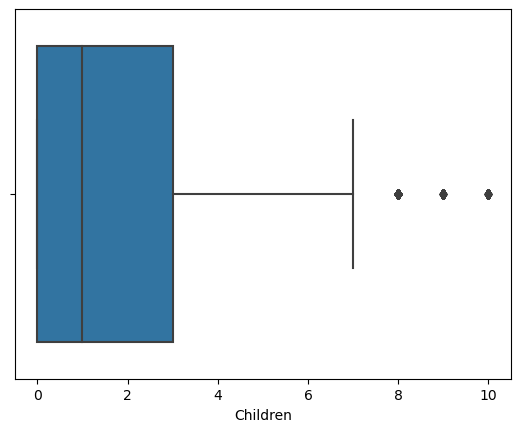

In [41]:
# Boxplot of the column
sns.boxplot(x = 'Children', data = df_new)
plt.show()

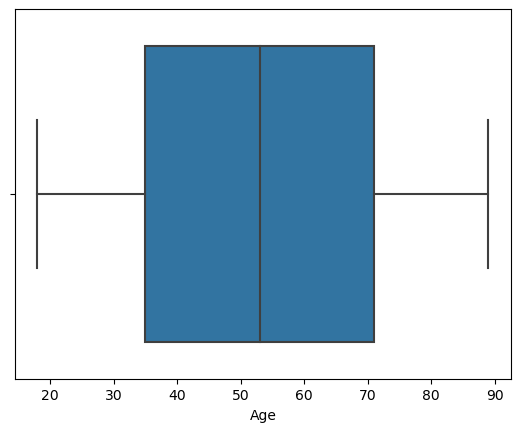

In [42]:
# Boxplot of the column
sns.boxplot(x = 'Age', data = df_new)
plt.show()

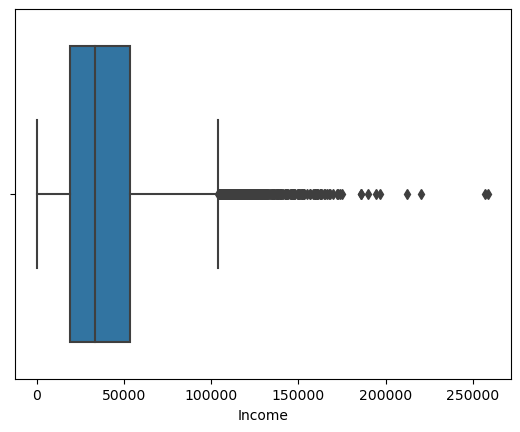

In [43]:
# Boxplot of the column
sns.boxplot(x = 'Income', data = df_new)
plt.show()

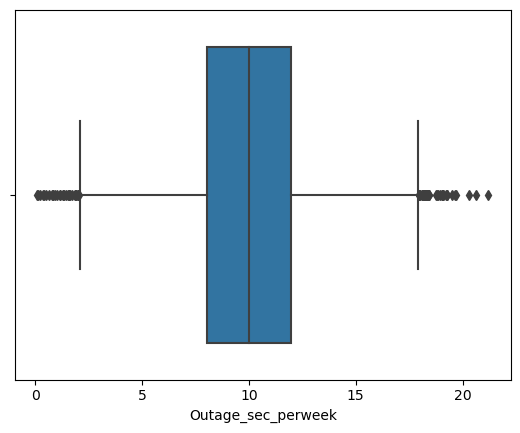

In [44]:
# Boxplot of the column
sns.boxplot(x = 'Outage_sec_perweek', data = df_new)
plt.show()

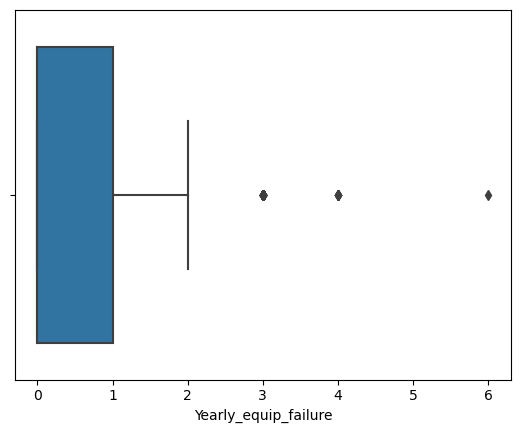

In [45]:
# Boxplot of the column
sns.boxplot(x = 'Yearly_equip_failure', data = df_new)
plt.show()

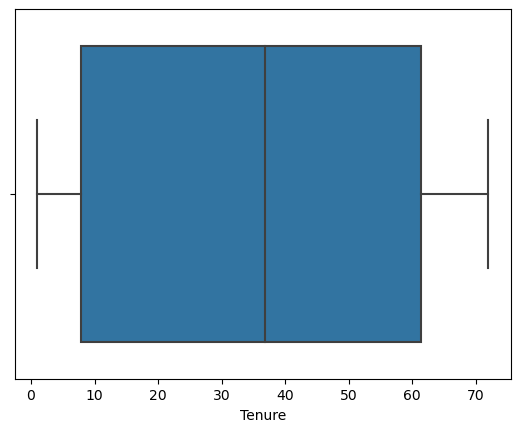

In [46]:
# Boxplot for the column
sns.boxplot(x = 'Tenure', data = df_new)
plt.show()

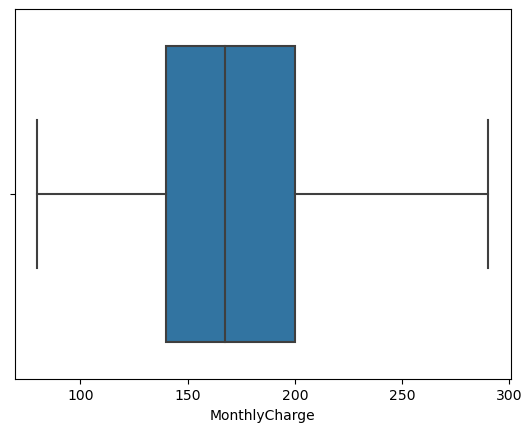

In [47]:
# Boxplot for the column
sns.boxplot(x = 'MonthlyCharge', data = df_new)
plt.show()

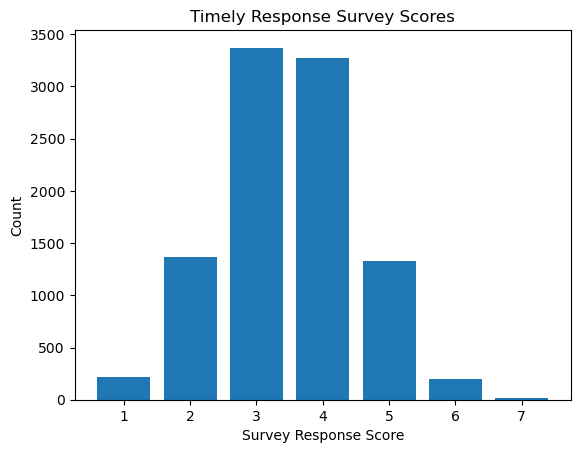

In [48]:
# Plotting Bar Chart for column
plt.bar(sorted_timelyresponse.index, sorted_timelyresponse.values)
plt.xlabel('Survey Response Score')
plt.ylabel('Count')
plt.title('Timely Response Survey Scores')
plt.show()

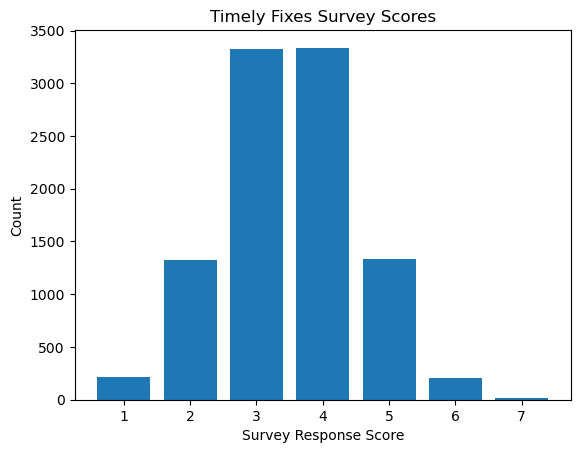

In [49]:
# Plotting Bar Chart for column
plt.bar(sorted_timelyfixes.index, sorted_timelyfixes.values)
plt.xlabel('Survey Response Score')
plt.ylabel('Count')
plt.title('Timely Fixes Survey Scores')
plt.show()

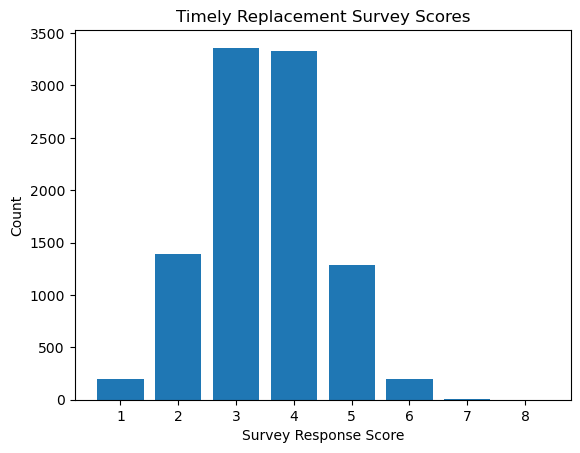

In [50]:
# Plotting Bar Chart for column
plt.bar(sorted_tr.index, sorted_tr.values)
plt.xlabel('Survey Response Score')
plt.ylabel('Count')
plt.title('Timely Replacement Survey Scores')
plt.show()

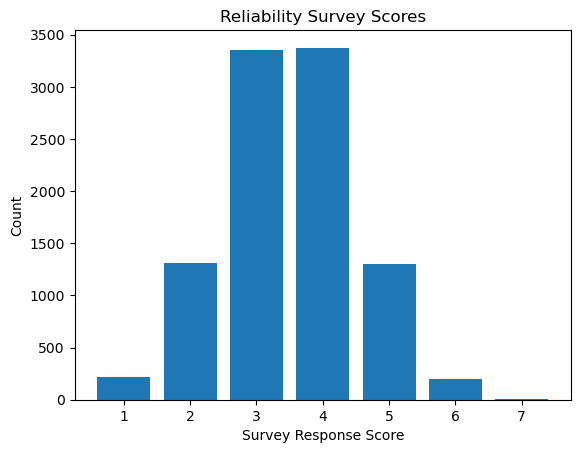

In [51]:
# Plotting Bar Chart for column
plt.bar(sorted_rel.index, sorted_rel.values)
plt.xlabel('Survey Response Score')
plt.ylabel('Count')
plt.title('Reliability Survey Scores')
plt.show()

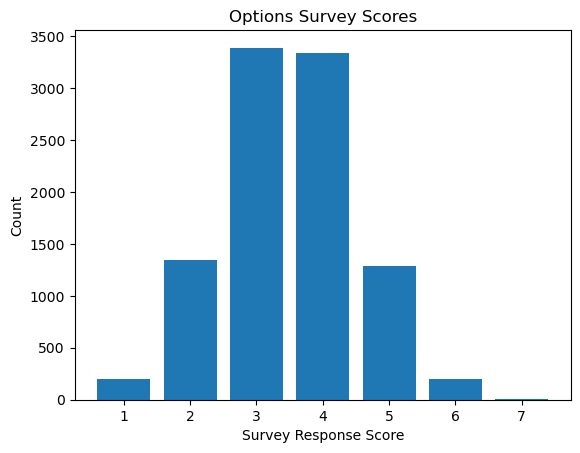

In [52]:
# Plotting Bar Chart for column
plt.bar(sorted_options.index, sorted_options.values)
plt.xlabel('Survey Response Score')
plt.ylabel('Count')
plt.title('Options Survey Scores')
plt.show()

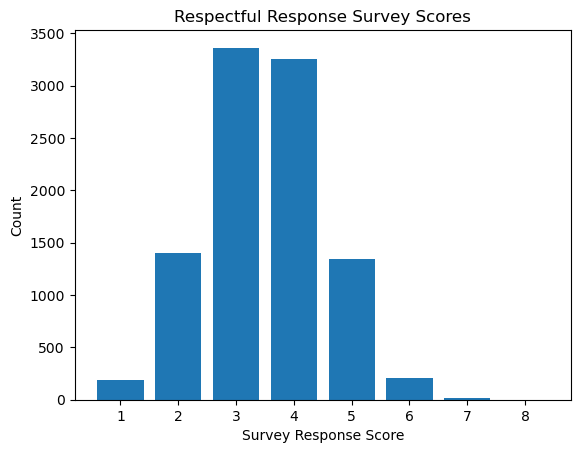

In [53]:
# Plotting Bar Chart for column
plt.bar(sorted_resp.index, sorted_resp.values)
plt.xlabel('Survey Response Score')
plt.ylabel('Count')
plt.title('Respectful Response Survey Scores')
plt.show()

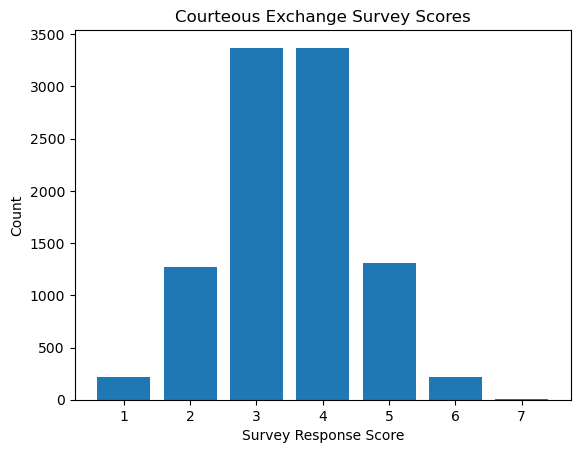

In [54]:
# Plotting Bar Chart for column
plt.bar(sorted_court.index, sorted_court.values)
plt.xlabel('Survey Response Score')
plt.ylabel('Count')
plt.title('Courteous Exchange Survey Scores')
plt.show()

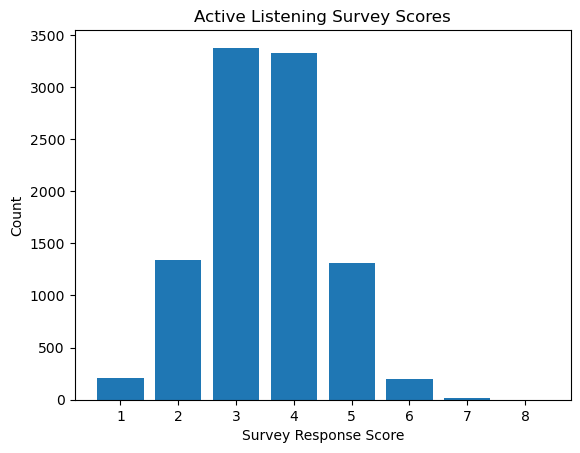

In [55]:
# Plotting Bar Chart for column
plt.bar(sorted_act.index, sorted_act.values)
plt.xlabel('Survey Response Score')
plt.ylabel('Count')
plt.title('Active Listening Survey Scores')
plt.show()

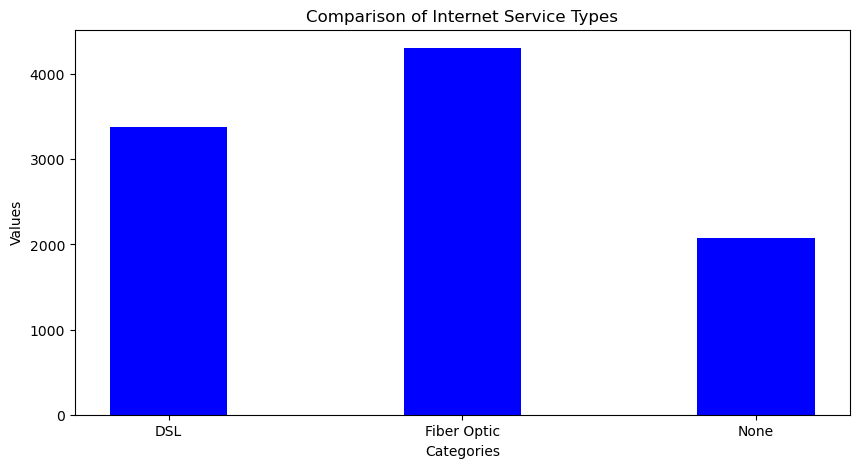

In [56]:
# Create dictionary and variables with the above calculated data
data = {'DSL': 3384, 'Fiber Optic': 4307, 'None': 2078}
contracts = list(data.keys())
values = list(data.values())
# Set the size of the plot
fig = plt.figure(figsize = (10, 5))
# Plot a bar chart
plt.bar(contracts, values, color = 'blue', width = 0.4)
# Label the bar chart
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Comparison of Internet Service Types')
# Display the bar chart
plt.show()

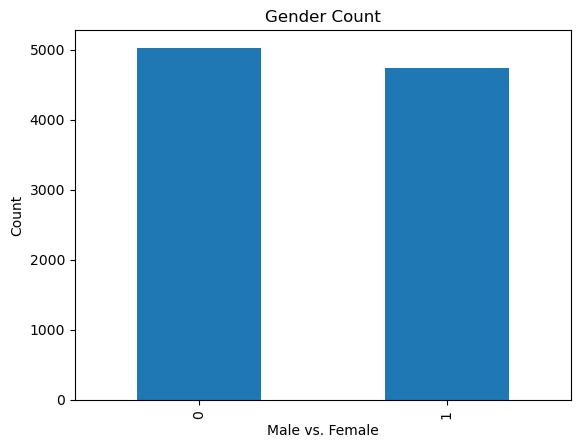

In [57]:
# Comparing counts of the column (1: Male, 0: Female)
gender_count.plot(kind='bar')
plt.xlabel('Male vs. Female')
plt.ylabel('Count')
plt.title('Gender Count')
plt.show()

In [58]:
# Summary statistics for the column (1: Yes, 0: No)
techie = df_new.Techie_New.value_counts()
print(techie)

Techie_New
0    8123
1    1646
Name: count, dtype: int64


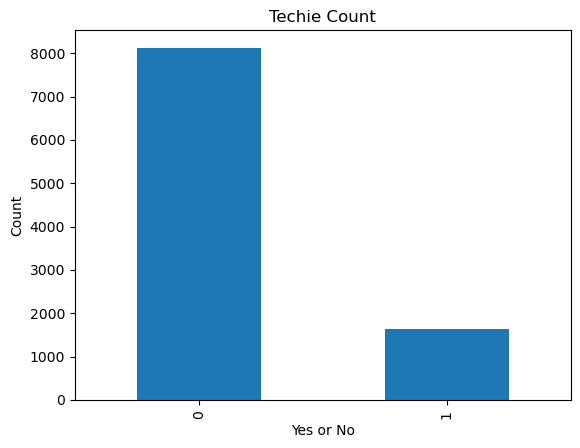

In [59]:
# Comparing counts of the column (1: Yes, 0: No)
techie.plot(kind='bar')
plt.xlabel('Yes or No')
plt.ylabel('Count')
plt.title('Techie Count')
plt.show()

In [60]:
# Summary statistics for the column (1: Yes, 0: No)
port = df_new.Port_modem_New.value_counts()
print(port)

Port_modem_New
0    5046
1    4723
Name: count, dtype: int64


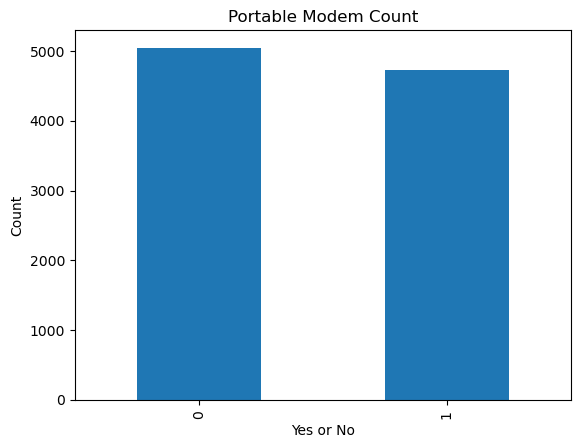

In [61]:
# Comparing counts of the column (1: Yes, 0: No)
port.plot(kind='bar')
plt.xlabel('Yes or No')
plt.ylabel('Count')
plt.title('Portable Modem Count')
plt.show()

In [62]:
# Summary statistics for the column (1: Yes, 0: No)
tab = df_new.Tablet_New.value_counts()
print(tab)

Tablet_New
0    6848
1    2921
Name: count, dtype: int64


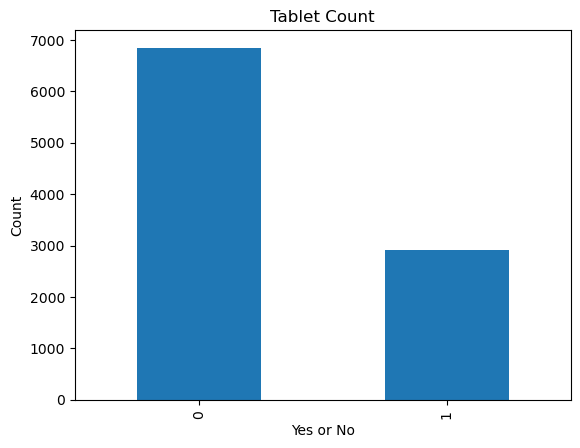

In [63]:
# Comparing counts of the column (1: Yes, 0: No)
tab.plot(kind='bar')
plt.xlabel('Yes or No')
plt.ylabel('Count')
plt.title('Tablet Count')
plt.show()

In [64]:
# Summary statistics for the column (1: Yes, 0: No)
phone = df_new.Phone_New.value_counts()
print(phone)

Phone_New
1    8856
0     913
Name: count, dtype: int64


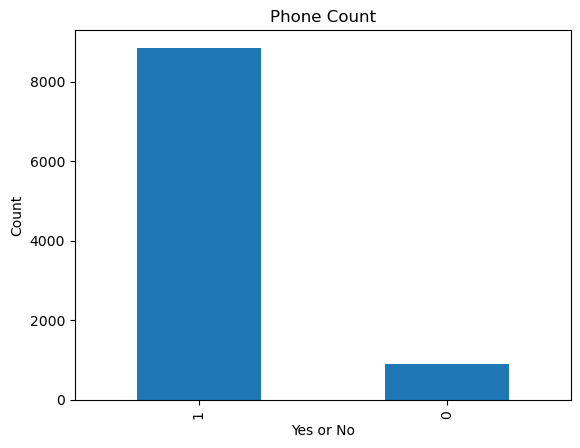

In [65]:
# Comparing counts of the column (1: Yes, 0: No)
phone.plot(kind='bar')
plt.xlabel('Yes or No')
plt.ylabel('Count')
plt.title('Phone Count')
plt.show()

In [66]:
# Summary statistics for the column (1: Yes, 0: No)
mult = df_new.Multiple_New.value_counts()
print(mult)

Multiple_New
0    5268
1    4501
Name: count, dtype: int64


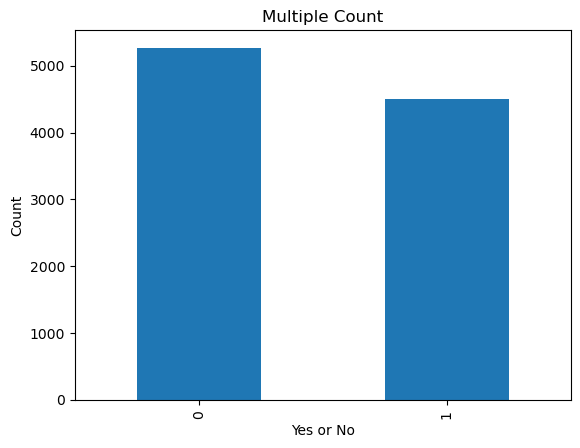

In [67]:
# Comparing counts of the column (1: Yes, 0: No)
mult.plot(kind='bar')
plt.xlabel('Yes or No')
plt.ylabel('Count')
plt.title('Multiple Count')
plt.show()

In [68]:
# Summary statistics for the column (1: Yes, 0: No)
os = df_new.OnlineSecurity_New.value_counts()
print(os)

OnlineSecurity_New
0    6272
1    3497
Name: count, dtype: int64


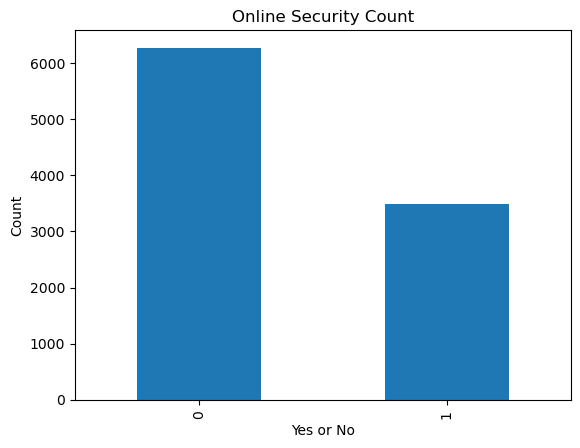

In [69]:
# Comparing counts of the column (1: Yes, 0: No)
os.plot(kind='bar')
plt.xlabel('Yes or No')
plt.ylabel('Count')
plt.title('Online Security Count')
plt.show()

In [70]:
# Summary statistics for the column (1: Yes, 0: No)
ob = df_new.OnlineBackup_New.value_counts()
print(ob)

OnlineBackup_New
0    5389
1    4380
Name: count, dtype: int64


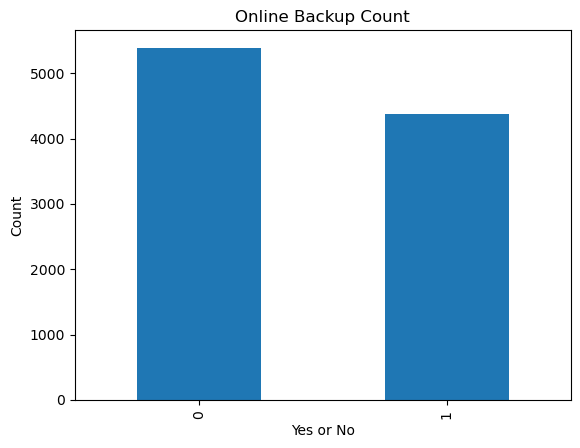

In [71]:
# Comparing counts of the column (1: Yes, 0: No)
ob.plot(kind='bar')
plt.xlabel('Yes or No')
plt.ylabel('Count')
plt.title('Online Backup Count')
plt.show()

In [72]:
# Summary statistics for the column (1: Yes, 0: No)
dp = df_new.DeviceProtection_New.value_counts()
print(dp)

DeviceProtection_New
0    5472
1    4297
Name: count, dtype: int64


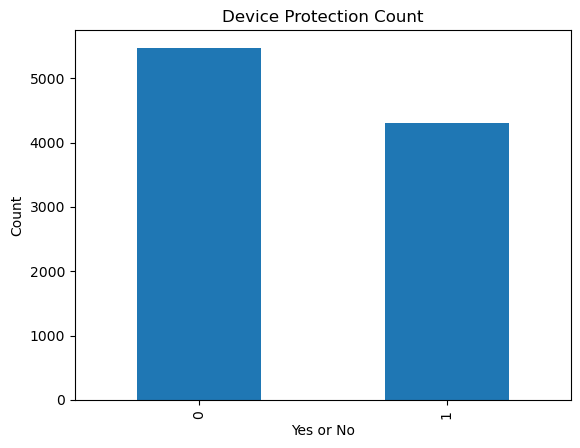

In [73]:
# Comparing counts of the column (1: Yes, 0: No)
dp.plot(kind='bar')
plt.xlabel('Yes or No')
plt.ylabel('Count')
plt.title('Device Protection Count')
plt.show()

In [74]:
# Summary statistics for the column (1: Yes, 0: No)
ts = df_new.TechSupport_New.value_counts()
print(ts)

TechSupport_New
0    6111
1    3658
Name: count, dtype: int64


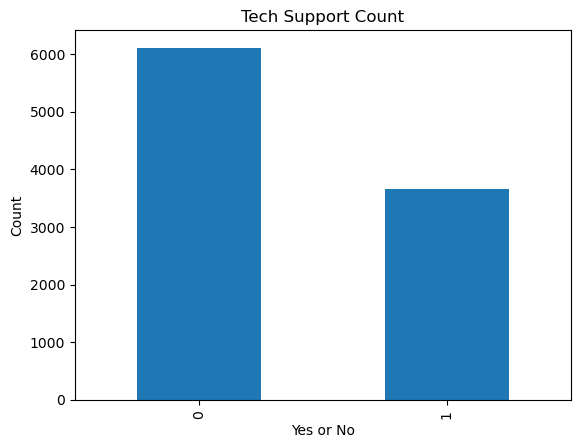

In [75]:
# Comparing counts of the column (1: Yes, 0: No)
ts.plot(kind='bar')
plt.xlabel('Yes or No')
plt.ylabel('Count')
plt.title('Tech Support Count')
plt.show()

In [76]:
# Summary statistics for the column (1: Yes, 0: No)
st = df_new.StreamingTV_New.value_counts()
print(st)

StreamingTV_New
0    4959
1    4810
Name: count, dtype: int64


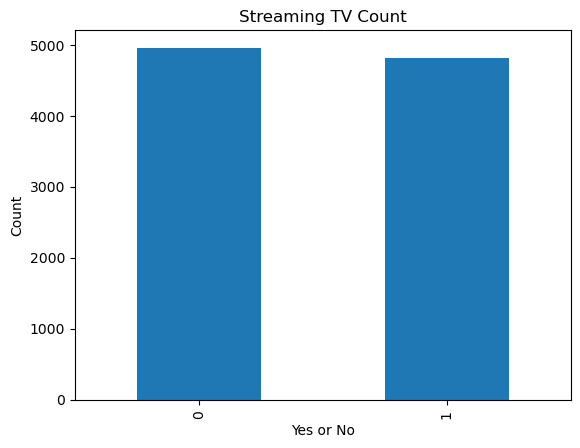

In [77]:
# Comparing counts of the column (1: Yes, 0: No)
st.plot(kind='bar')
plt.xlabel('Yes or No')
plt.ylabel('Count')
plt.title('Streaming TV Count')
plt.show()

In [78]:
# Summary statistics for the column (1: Yes, 0: No)
sm = df_new.StreamingMovies_New.value_counts()
print(sm)

StreamingMovies_New
0    4986
1    4783
Name: count, dtype: int64


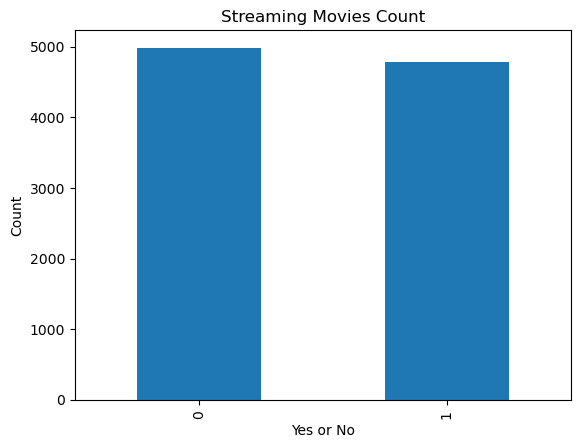

In [79]:
# Comparing counts of the column (1: Yes, 0: No)
sm.plot(kind='bar')
plt.xlabel('Yes or No')
plt.ylabel('Count')
plt.title('Streaming Movies Count')
plt.show()

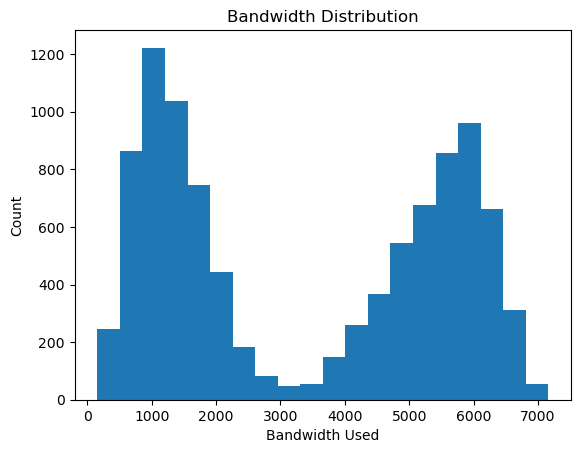

In [80]:
# Histogram for column
plt.hist(df_new['Bandwidth_GB_Year'], bins = 20)
plt.xlabel('Bandwidth Used')
plt.ylabel('Count')
plt.title('Bandwidth Distribution')
plt.show()

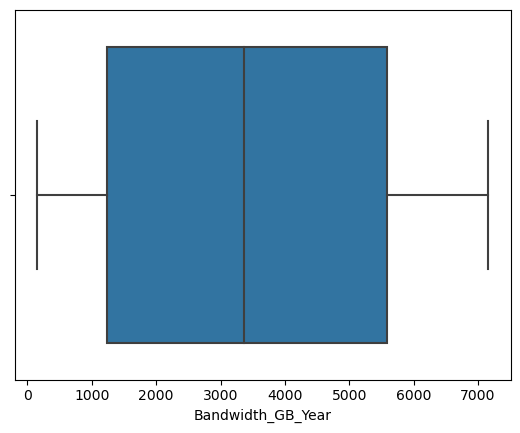

In [81]:
sns.boxplot(x = 'Bandwidth_GB_Year', data = df_new)
plt.show()

After inspecting all of the visualizations for the variables we will be looking at, there are some outliers. However, I have decided to keep them because they seem to be natural outliers.

1. Children - The outliers are on the high side, but in theory a larger family with more children will possibly help in predicting the relationship for our dependent variable. It is also plausible to have a large family.
2. Income - There will always be customers making larger than average amounts of moeny that still need to buy internet and phone services. A larger income could correlate to more services that can eat up bandwidth. It is a natural outlier.
3. Outage_sec_perweek - The amount of outages a customer faces will likely influence the amount of bandwidth they use. Some people are fortunate enough to experience very little outages can show a higher bandwidth usage which may be good information for the company, as well as vice versa for those experiencing frequent outages.
4. Yearly_equip_failure - The number of times customers equipment is broken will likely influence the amount of data a customer uses. If so, the company can focus on ways to limit the equipment downtime if the goal is to have customers using more data. On the flip side, if the company hopes to reduce data usage, they can follow Apple's lead and design equipment that will need to be upgraded or re-serviced after just two years (LOL!).

## C3.2: Bivariate Visualizations

Below are the bivariate visualizations of all the independent variables against the dependent variable (Bandwidth_GB_Year).

<Axes: xlabel='Children', ylabel='Bandwidth_GB_Year'>

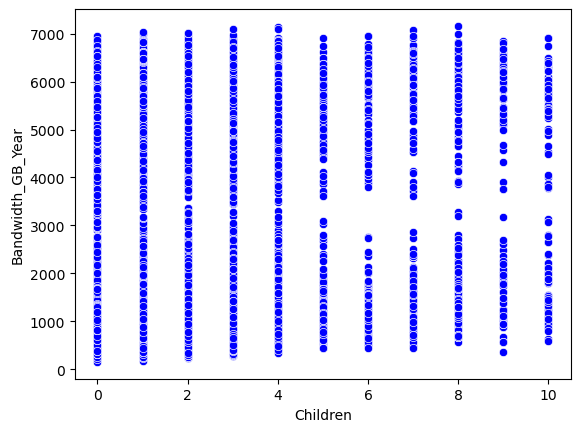

In [82]:
sns.scatterplot(data=df_new, x='Children', y='Bandwidth_GB_Year', color='blue')

<Axes: xlabel='Age', ylabel='Bandwidth_GB_Year'>

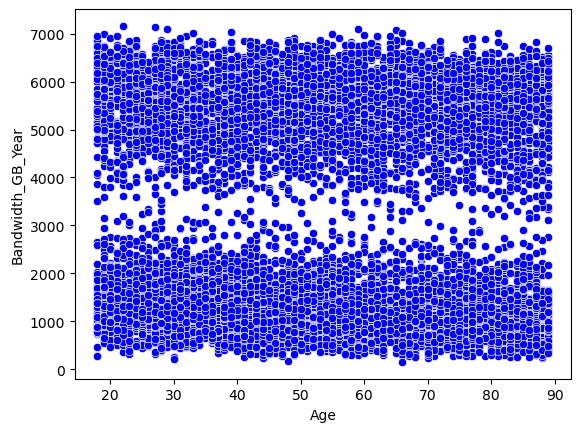

In [83]:
sns.scatterplot(data=df_new, x='Age', y='Bandwidth_GB_Year', color='blue')

<Axes: xlabel='Income', ylabel='Bandwidth_GB_Year'>

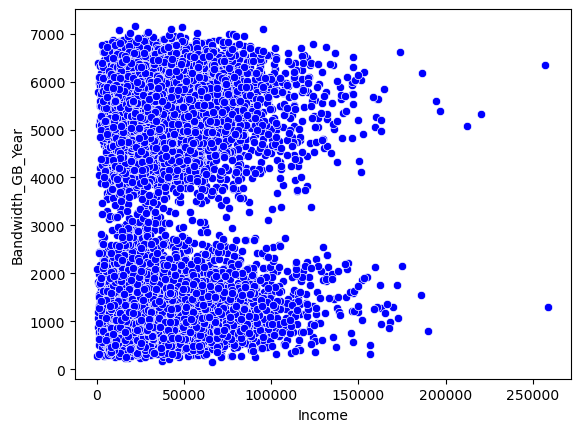

In [84]:
sns.scatterplot(data=df_new, x='Income', y='Bandwidth_GB_Year', color='blue')

<Axes: xlabel='Outage_sec_perweek', ylabel='Bandwidth_GB_Year'>

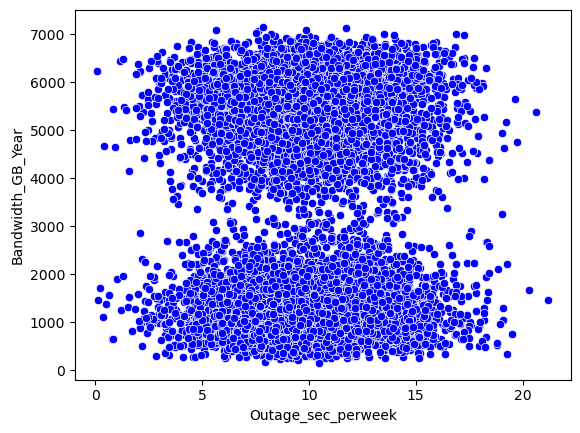

In [85]:
sns.scatterplot(data=df_new, x='Outage_sec_perweek', y='Bandwidth_GB_Year', color='blue')

<Axes: xlabel='Yearly_equip_failure', ylabel='Bandwidth_GB_Year'>

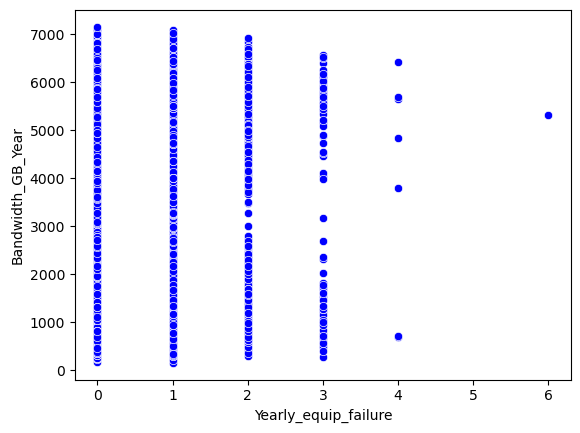

In [86]:
sns.scatterplot(data=df_new, x='Yearly_equip_failure', y='Bandwidth_GB_Year', color='blue')

<Axes: xlabel='Tenure', ylabel='Bandwidth_GB_Year'>

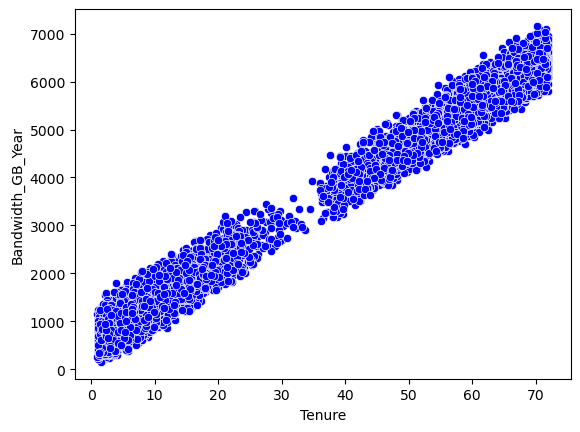

In [87]:
sns.scatterplot(data=df_new, x='Tenure', y='Bandwidth_GB_Year', color='blue')

<Axes: xlabel='MonthlyCharge', ylabel='Bandwidth_GB_Year'>

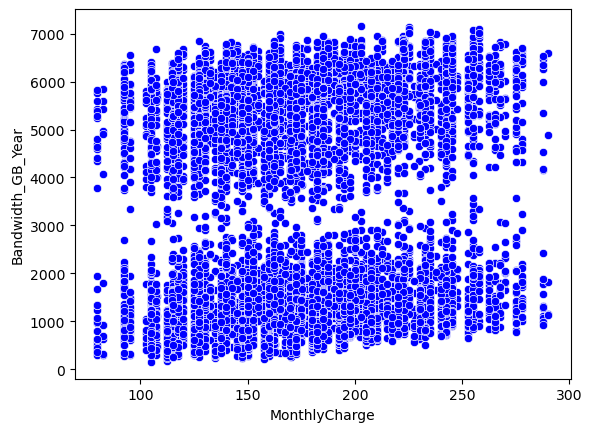

In [88]:
sns.scatterplot(data=df_new, x='MonthlyCharge', y='Bandwidth_GB_Year', color='blue')

<Axes: xlabel='TimelyResponse', ylabel='Bandwidth_GB_Year'>

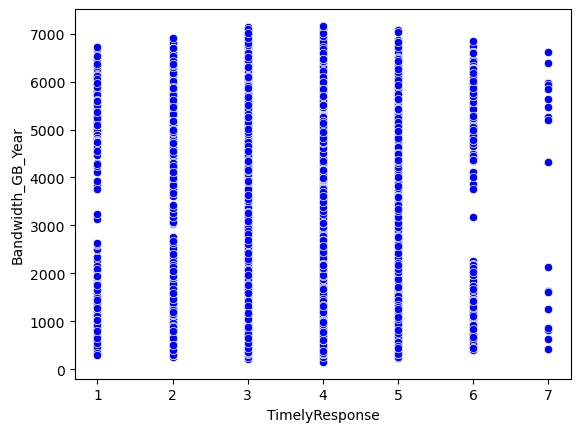

In [89]:
sns.scatterplot(data=df_new, x='TimelyResponse', y='Bandwidth_GB_Year', color='blue')

<Axes: xlabel='TimelyFixes', ylabel='Bandwidth_GB_Year'>

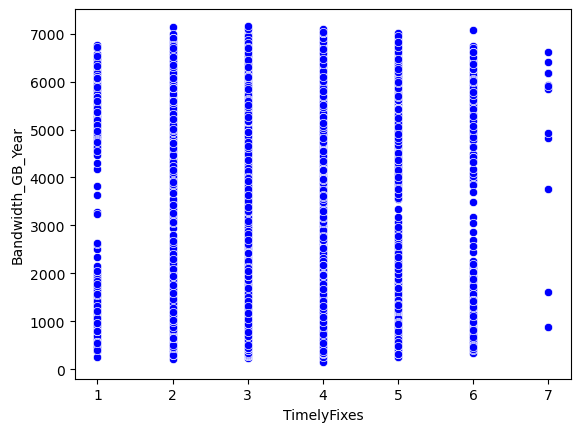

In [90]:
sns.scatterplot(data=df_new, x='TimelyFixes', y='Bandwidth_GB_Year', color='blue')

<Axes: xlabel='TimelyReplacements', ylabel='Bandwidth_GB_Year'>

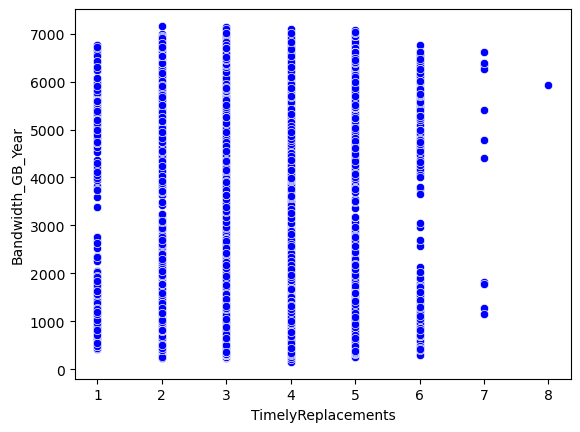

In [91]:
sns.scatterplot(data=df_new, x='TimelyReplacements', y='Bandwidth_GB_Year', color='blue')

<Axes: xlabel='Reliability', ylabel='Bandwidth_GB_Year'>

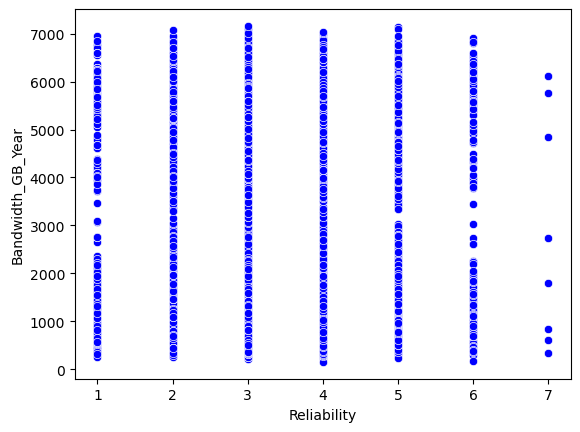

In [92]:
sns.scatterplot(data=df_new, x='Reliability', y='Bandwidth_GB_Year', color='blue')

<Axes: xlabel='Options', ylabel='Bandwidth_GB_Year'>

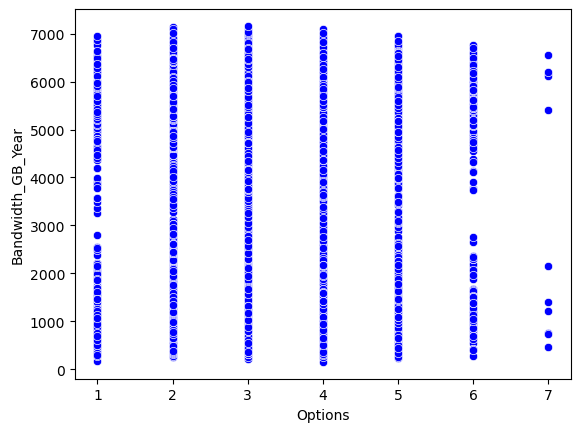

In [93]:
sns.scatterplot(data=df_new, x='Options', y='Bandwidth_GB_Year', color='blue')

<Axes: xlabel='RespectfulResponse', ylabel='Bandwidth_GB_Year'>

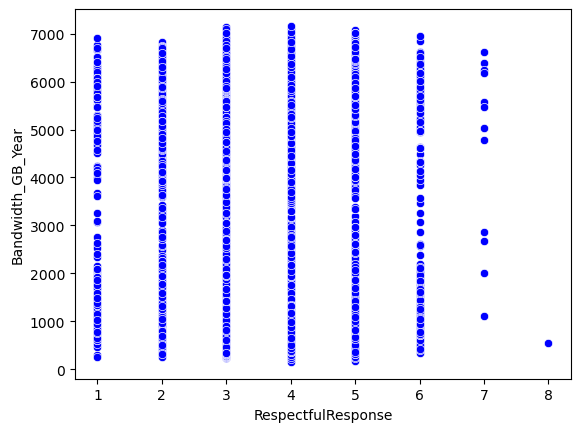

In [94]:
sns.scatterplot(data=df_new, x='RespectfulResponse', y='Bandwidth_GB_Year', color='blue')

<Axes: xlabel='CourteousExchange', ylabel='Bandwidth_GB_Year'>

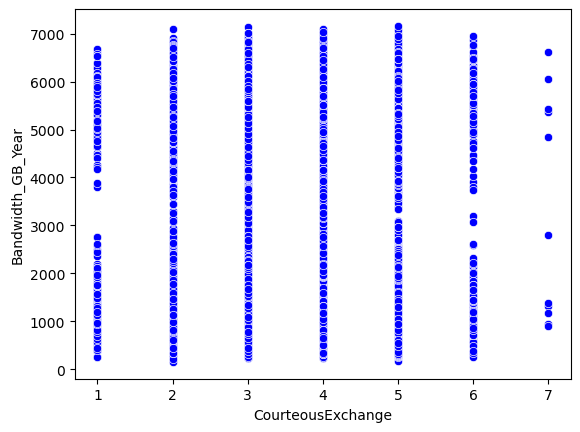

In [95]:
sns.scatterplot(data=df_new, x='CourteousExchange', y='Bandwidth_GB_Year', color='blue')

<Axes: xlabel='ActiveListening', ylabel='Bandwidth_GB_Year'>

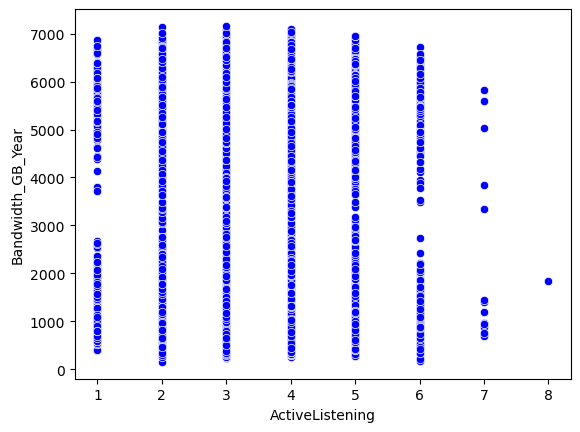

In [96]:
sns.scatterplot(data=df_new, x='ActiveListening', y='Bandwidth_GB_Year', color='blue')

In [97]:
# One last inspection of the dataframe
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9769 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children              9769 non-null   int64  
 1   Age                   9769 non-null   int64  
 2   Income                9769 non-null   float64
 3   Outage_sec_perweek    9769 non-null   float64
 4   Yearly_equip_failure  9769 non-null   int64  
 5   Tenure                9769 non-null   float64
 6   MonthlyCharge         9769 non-null   float64
 7   TimelyResponse        9769 non-null   int64  
 8   TimelyFixes           9769 non-null   int64  
 9   TimelyReplacements    9769 non-null   int64  
 10  Reliability           9769 non-null   int64  
 11  Options               9769 non-null   int64  
 12  RespectfulResponse    9769 non-null   int64  
 13  CourteousExchange     9769 non-null   int64  
 14  ActiveListening       9769 non-null   int64  
 15  IS_DSL                9769

I am not sure where the unnamed column came from, but I will drop it to ensure the final data set is fully cleaned and ready to use in the regression model.

## C4: Data Transformation Goals

For this assignment, I used a "kitchen-sink" method to choose my variables. I chose to look at variables that interested me and removed the columns of data that I was not curious about. These variables could be beneficial to analyze in another model, but for the sake of this assignment, I am interested in the remaining variables.

I inspected the entire data frame and made some modifications to make sure the data is logically represented when we use it for the regression model. All in all, the data is prepared, cleaned, and has no missing or duplicate rows. We are ready to run it through the model and begin trying to reduce the model.

## C5: Prepared Data File

Below is the code used to export the dataframe to a CSV file.

The CSV file 'd208_task1_cleaned.csv' will be uploaded to the submission folder.

In [98]:
# Exporting dataframe to a new csv
df_new.to_csv('d208_task1_cleaned.csv')
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [99]:
# Re-reading csv into a data frame and inspecting variables for analysis
df_new = pd.read_csv('d208_task1_cleaned.csv', index_col = 0)
col = df_new.columns
print(col)

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'TimelyResponse',
       'TimelyFixes', 'TimelyReplacements', 'Reliability', 'Options',
       'RespectfulResponse', 'CourteousExchange', 'ActiveListening', 'IS_DSL',
       'IS_Fiber Optic', 'IS_None', 'Gender_New', 'Techie_New',
       'Port_modem_New', 'Tablet_New', 'Phone_New', 'Multiple_New',
       'OnlineSecurity_New', 'OnlineBackup_New', 'DeviceProtection_New',
       'TechSupport_New', 'StreamingTV_New', 'StreamingMovies_New',
       'Bandwidth_GB_Year'],
      dtype='object')


## D1: Initial Multiple Regression Model

Below is our first run of a regression model with the cleaned data set. In order to prepare for running through statsmodels OLS function, we establish an intercept as 1.

We then create a variable to reuse as we reduce the model for the response variable, Bandwidth_GB_Year.

We also establish our explanatory variables by simply dropping the response variable from the series so they can easily be passed through the function.

One thing to note, I left IS_None until now. When we encode dummy variables with more than two options, we need to keep one left out, which will become our reference variable. I drop 'IS_None' here. As I mentioned earlier in this assignment, there is an easier way to do this within the .get_dummies() function, but I simply overlooked it and was able to proceed this way.

In [100]:
# Establishing the intercept, response variable, and explanatory variables
df_new['intercept'] = 1
resp1_var = df_new['Bandwidth_GB_Year']
exp_vars = df_new.drop(columns = ['Bandwidth_GB_Year','IS_None'])

In [101]:
# Building the initial regression model with stats models ordinary least squares
model = sm.OLS(resp1_var, exp_vars)
lr1 = model.fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.074e+07
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:50:50   Log-Likelihood:                -35095.
No. Observations:                9769   AIC:                         7.025e+04
Df Residuals:                    9739   BIC:                         7.046e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.7620 

As can be seen in the summary of the model, we have the HIGHEST R-squared value possible. With this many variables included in the model, this likely means there is a high level of multicolinearity.


## D2: Justification of Reduction Method

In order to improve the model and make it usable, we will need to reduce the number of variables through a statistical approach. My first approach is to calculate the Variation Inflation Factor (VIF) of all the explanatory variables. We can systematically remove one variable at a time by removing very high values that indicate the variation is unstable one by one.

This approach I found via __[Analytics Vidhya: Multicollinearity | Causes, Effects and Detection Using VIF](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/#:~:text=To%20fix%20multicollinearity%2C%20one%20can,retaining%20most%20of%20the%20information.)__. VIF allows us to determine the strength of correlation between the independent variables by taking one variable, and regressing it against all other variables in the data set. Typically a VIF higher than 5 is not good and suggests a high level of multicolinearity. The scale starts at 1 and goes up without an upper end limit, meaning for our model, we would like our VIF factors to be as close to 1 as possible to eliminate multicolinearity effects. 

After reducing the VIF factors to a reasonable level, we will use backwards stepwise reduction. This process requires us to remove one variable at a time until all variables in the model meet our significance level (p-value < 0.05). It seems to be a tedious process and brute force method of reduction, but it will work to finalize the model. This method was chosen via __[Towards Data Science: Feature Selection Techniques in Regression Model](https://towardsdatascience.com/feature-selection-techniques-in-regression-model-26878fe0e24e)__

In [102]:
# Inspecting the variance inflation factor (VIF) to check for unstable variables and multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)

In [103]:
# Dropping dependent variable to inspect correlation between dependent variables
calc_vif(exp_vars)

,variables,VIF
0,Children,1.002698
1,Age,1.003314
2,Income,1.003174
3,Outage_sec_perweek,1.003311
4,Yearly_equip_failure,1.002304
5,Tenure,1.003867
6,MonthlyCharge,23.923843
7,TimelyResponse,2.216020
8,TimelyFixes,1.932228
9,TimelyReplacements,1.602078


In [104]:
# Removing variables with infinite VIFs, very unstable predictor variables
exp_vars = exp_vars.drop(columns = ['MonthlyCharge'])

MonthlyCharge has a very high VIF value (above 10) and should be removed from the dataframe. This indicates very high levels of multicolinearity.

In [105]:
# Running OLS linear regression model
model = sm.OLS(resp1_var, exp_vars)
lr = model.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.310e+06
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:50:50   Log-Likelihood:                -45986.
No. Observations:                9769   AIC:                         9.203e+04
Df Residuals:                    9740   BIC:                         9.224e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.7998 

In [106]:
# Inspecting VIF after removing internet service types.
calc_vif(exp_vars)

,variables,VIF
0,Children,1.002688
1,Age,1.003214
2,Income,1.003065
3,Outage_sec_perweek,1.003283
4,Yearly_equip_failure,1.002225
5,Tenure,1.003841
6,TimelyResponse,2.215796
7,TimelyFixes,1.931499
8,TimelyReplacements,1.602078
9,Reliability,1.277288


After inspecting this chart of VIF values, they all look stable enough to begin the backward stepwise regression method. With this method, we will look at the largest p-values (least statistical significance) and remove them one-by-one, continually re-running the regression model until all of the variables have p-values below 0.05. 

In [107]:
# Running OLS regression model
model = sm.OLS(resp1_var, exp_vars)
lr = model.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.310e+06
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:50:51   Log-Likelihood:                -45986.
No. Observations:                9769   AIC:                         9.203e+04
Df Residuals:                    9740   BIC:                         9.224e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.7998 

In [108]:
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.92


In [109]:
# Removing Fiber Optic column because highest p-value (0.920)
exp_vars = exp_vars.drop(columns = ['IS_Fiber Optic'])
model = sm.OLS(resp1_var, exp_vars)
lr = model.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.396e+06
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:50:51   Log-Likelihood:                -45986.
No. Observations:                9769   AIC:                         9.203e+04
Df Residuals:                    9741   BIC:                         9.223e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.7997 

In [110]:
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.88


In [111]:
# Remvoing Respectful Response column with highest p-value (0.88)
exp_vars = exp_vars.drop(columns = ['RespectfulResponse'])
model = sm.OLS(resp1_var, exp_vars)
lr = model.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.489e+06
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:50:51   Log-Likelihood:                -45986.
No. Observations:                9769   AIC:                         9.203e+04
Df Residuals:                    9742   BIC:                         9.222e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.7998 

In [112]:
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.748


In [113]:
# Removing Timely Replacements column with highest p-vale (0.748)
exp_vars = exp_vars.drop(columns = ['TimelyReplacements'])
model = sm.OLS(resp1_var, exp_vars)
lr = model.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.588e+06
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:50:51   Log-Likelihood:                -45986.
No. Observations:                9769   AIC:                         9.202e+04
Df Residuals:                    9743   BIC:                         9.221e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.8000 

In [114]:
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.643


In [115]:
# Removing Courteous Exchange column with highest p-vale (0.643)
exp_vars = exp_vars.drop(columns = ['CourteousExchange'])
model = sm.OLS(resp1_var, exp_vars)
lr = model.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.696e+06
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:50:51   Log-Likelihood:                -45986.
No. Observations:                9769   AIC:                         9.202e+04
Df Residuals:                    9744   BIC:                         9.220e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.7999 

In [116]:
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.619


In [117]:
# Removing Active Listening with highest p-value (0.619)
exp_vars = exp_vars.drop(columns = ['ActiveListening'])
model = sm.OLS(resp1_var, exp_vars)
lr = model.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.814e+06
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:50:51   Log-Likelihood:                -45986.
No. Observations:                9769   AIC:                         9.202e+04
Df Residuals:                    9745   BIC:                         9.219e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.8005 

In [118]:
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.487


In [119]:
# Removing Reliability with highest p-value (0.487)
exp_vars = exp_vars.drop(columns = ['Reliability'])
model = sm.OLS(resp1_var, exp_vars)
lr = model.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.942e+06
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:50:51   Log-Likelihood:                -45986.
No. Observations:                9769   AIC:                         9.202e+04
Df Residuals:                    9746   BIC:                         9.218e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.7990 

In [120]:
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.479


In [121]:
# Removing CourteousExchange with highest p-value (0.479)
exp_vars = exp_vars.drop(columns = ['Options'])
model = sm.OLS(resp1_var, exp_vars)
lr = model.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.082e+06
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:50:51   Log-Likelihood:                -45986.
No. Observations:                9769   AIC:                         9.202e+04
Df Residuals:                    9747   BIC:                         9.217e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.7987 

In [122]:
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.449


In [123]:
# Removing Yearly_equip_failure with highest p-value (0.449)
exp_vars = exp_vars.drop(columns = ['Yearly_equip_failure'])
model = sm.OLS(resp1_var, exp_vars)
lr = model.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.236e+06
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:50:51   Log-Likelihood:                -45987.
No. Observations:                9769   AIC:                         9.202e+04
Df Residuals:                    9748   BIC:                         9.217e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.7980 

In [124]:
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.441


In [125]:
# Removing Tablet_New with highest p-value (0.441)
exp_vars = exp_vars.drop(columns = ['Tablet_New'])
model = sm.OLS(resp1_var, exp_vars)
lr = model.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.407e+06
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:50:51   Log-Likelihood:                -45987.
No. Observations:                9769   AIC:                         9.201e+04
Df Residuals:                    9749   BIC:                         9.216e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.7984 

In [126]:
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.425


In [127]:
# Removing Outage_sec_perweek with highest p-value (0.425)
exp_vars = exp_vars.drop(columns = ['Outage_sec_perweek'])
model = sm.OLS(resp1_var, exp_vars)
lr = model.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.596e+06
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:50:51   Log-Likelihood:                -45987.
No. Observations:                9769   AIC:                         9.201e+04
Df Residuals:                    9750   BIC:                         9.215e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.7981 

In [128]:
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.393


In [129]:
# Removing Income with highest p-value (0.393)
exp_vars = exp_vars.drop(columns = ['Income'])
model = sm.OLS(resp1_var, exp_vars)
lr = model.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.808e+06
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:50:51   Log-Likelihood:                -45988.
No. Observations:                9769   AIC:                         9.201e+04
Df Residuals:                    9751   BIC:                         9.214e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.7990 

In [130]:
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.117


In [131]:
# Removing Timely Response with highest p-value (0.117)
exp_vars = exp_vars.drop(columns = ['TimelyResponse'])
model = sm.OLS(resp1_var, exp_vars)
lr = model.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.045e+06
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:50:51   Log-Likelihood:                -45989.
No. Observations:                9769   AIC:                         9.201e+04
Df Residuals:                    9752   BIC:                         9.213e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.7980 

In [132]:
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.303


In [133]:
# Removing Port Modem with highest p-value (0.303)
exp_vars = exp_vars.drop(columns = ['Port_modem_New'])
model = sm.OLS(resp1_var, exp_vars)
lr = model.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.314e+06
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:50:51   Log-Likelihood:                -45991.
No. Observations:                9769   AIC:                         9.201e+04
Df Residuals:                    9753   BIC:                         9.213e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.7958 

In [134]:
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.305


In [135]:
# Removing Techie with highest p-value (0.305)
exp_vars = exp_vars.drop(columns = ['Techie_New'])
model = sm.OLS(resp1_var, exp_vars)
lr = model.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.621e+06
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:50:51   Log-Likelihood:                -45992.
No. Observations:                9769   AIC:                         9.201e+04
Df Residuals:                    9754   BIC:                         9.212e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.7944 

In [136]:
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.298


In [137]:
# Removing Phone with highest p-value (0.298)
exp_vars = exp_vars.drop(columns = ['Phone_New'])
model = sm.OLS(resp1_var, exp_vars)
lr = model.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.975e+06
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:50:51   Log-Likelihood:                -45994.
No. Observations:                9769   AIC:                         9.202e+04
Df Residuals:                    9755   BIC:                         9.212e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.7947 

In [138]:
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.323


In [139]:
# Removing TimelyFixes with highest p-value (0.323)
exp_vars = exp_vars.drop(columns = ['TimelyFixes'])
model = sm.OLS(resp1_var, exp_vars)
lr = model.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.390e+06
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:50:52   Log-Likelihood:                -45994.
No. Observations:                9769   AIC:                         9.201e+04
Df Residuals:                    9756   BIC:                         9.211e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.7965 

In [140]:
summary_table = lr.summary()
p_values = summary_table.tables[1].data[1:]

# Convert p-values to floats
p_values = [float(row[4]) for row in p_values]

# Find the highest p-value
highest_p_value = max(p_values)

print("Highest p-value:", highest_p_value)

Highest p-value: 0.0


After remvoing multiple variables via backwards stepwise regression, we have reached a point where all of our variables have alpha values that are less than 0.05. This means they are acceptable and significant to describing the response variable.

We will take one last look at the VIF calculation to ensure there are no extremely high values.

In [141]:
calc_vif(exp_vars)

,variables,VIF
0,Children,1.001652
1,Age,1.002090
2,Tenure,1.002118
3,IS_DSL,1.001053
4,Gender_New,1.001340
5,Multiple_New,1.000961
6,OnlineSecurity_New,1.001183
7,OnlineBackup_New,1.000852
8,DeviceProtection_New,1.002116
9,TechSupport_New,1.001494


Hooray! We have successfully reduced our initial model from 30 explanatory variables down to 12. The variables that we will keep and are statistically significant in predicting the amount of bandwidth usage are:

1. Children
2. Age
3. Tenure
4. IS_DSL
5. Gender
6. Multiple
7. Online Security
8. Online Backup
9. Device Protection
10. Tech Support
11. Streaming TV
12. Streaming Movies

All of the above variables logically make sense to me. For a given customer, a lot of these variables include add-on services that can be used and would likely eat up more data. For customers not adding on certain services, it is likely that they are using less data on a given month, year, or however long they are a customer.

Other data points make sense to me as well as to why they are statistically significant. Increased children, means increased people using the services. Age can determine someone's likelihood to be an internet user (i.e. Kids are more in tune with technology typically and use the internet and streaming services more often than the older generation. There could also be bands for middle-aged people who work from home and use the internet daily for work).

## D3: Reduced Model

Below is a copy of the above code to show the final fully reduced model and the summary output that comes with it.

In [142]:
# Final model and summary
model = sm.OLS(resp1_var, exp_vars)
lr = model.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.390e+06
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:50:52   Log-Likelihood:                -45994.
No. Observations:                9769   AIC:                         9.201e+04
Df Residuals:                    9756   BIC:                         9.211e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.7965 

## E1: Explain Data Analysis Process

A majority of what will be explained here has already been discuessed in earlier parts of this assignment. To recap, we built our initial model using a "kitchen-sink" method where I simply selected variables I found to be interesting. There were a large number of independent variables considered in the analysis and for a future approach I would probably reduce my initial selection.

In order to address multicollinearity issues, we calculated the VIF factors of all the independent variables and removed those that were extremely high. Some of these had infinite values, meaning there could not be any more multicollinearity than what existed between them. After removing all of these we moved to a process called backward stepwise regression to get to our final variable.

Backward stepwise regression allows us to find all of the variables that are statistically significant in helping describe the response variable in the model. Our alpha value (alpha = 0.05) was the standard for statistical analysis. We continuously ran the model, removing the variable with the highest p-value each time until we got to a point where all of the remaining variables were below our significance factor. This meant that the remaining explanatory variables all significantly helped in describing the bandwidth usage for a customer.

## E2: Output of Analysis

Please refer to the above for all outputs and methodologies that went into this multiple linear regression analysis.

I will say that this part of the assignment is somewhat confusing and seems to be asking for redundant things. I have provided the output in D2 and D3 of this report with explanations for how and why I was working with the data.

Below is the output for the residual plots of the model. In order to do this, I got help from __[Geeks for Geeks: Residual Plots in Python](https://www.geeksforgeeks.org/how-to-create-a-residual-plot-in-python/)__.



In [143]:
exp_vars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9769 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children              9769 non-null   int64  
 1   Age                   9769 non-null   int64  
 2   Tenure                9769 non-null   float64
 3   IS_DSL                9769 non-null   int64  
 4   Gender_New            9769 non-null   int64  
 5   Multiple_New          9769 non-null   int64  
 6   OnlineSecurity_New    9769 non-null   int64  
 7   OnlineBackup_New      9769 non-null   int64  
 8   DeviceProtection_New  9769 non-null   int64  
 9   TechSupport_New       9769 non-null   int64  
 10  StreamingTV_New       9769 non-null   int64  
 11  StreamingMovies_New   9769 non-null   int64  
 12  intercept             9769 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 1.0 MB


In order to better visualize how the reduced model performs, we can create residual plots for each of the variables. In order to this I turned to __[Geeks for Geeks](https://www.geeksforgeeks.org/how-to-create-a-residual-plot-in-python/)__ for help.

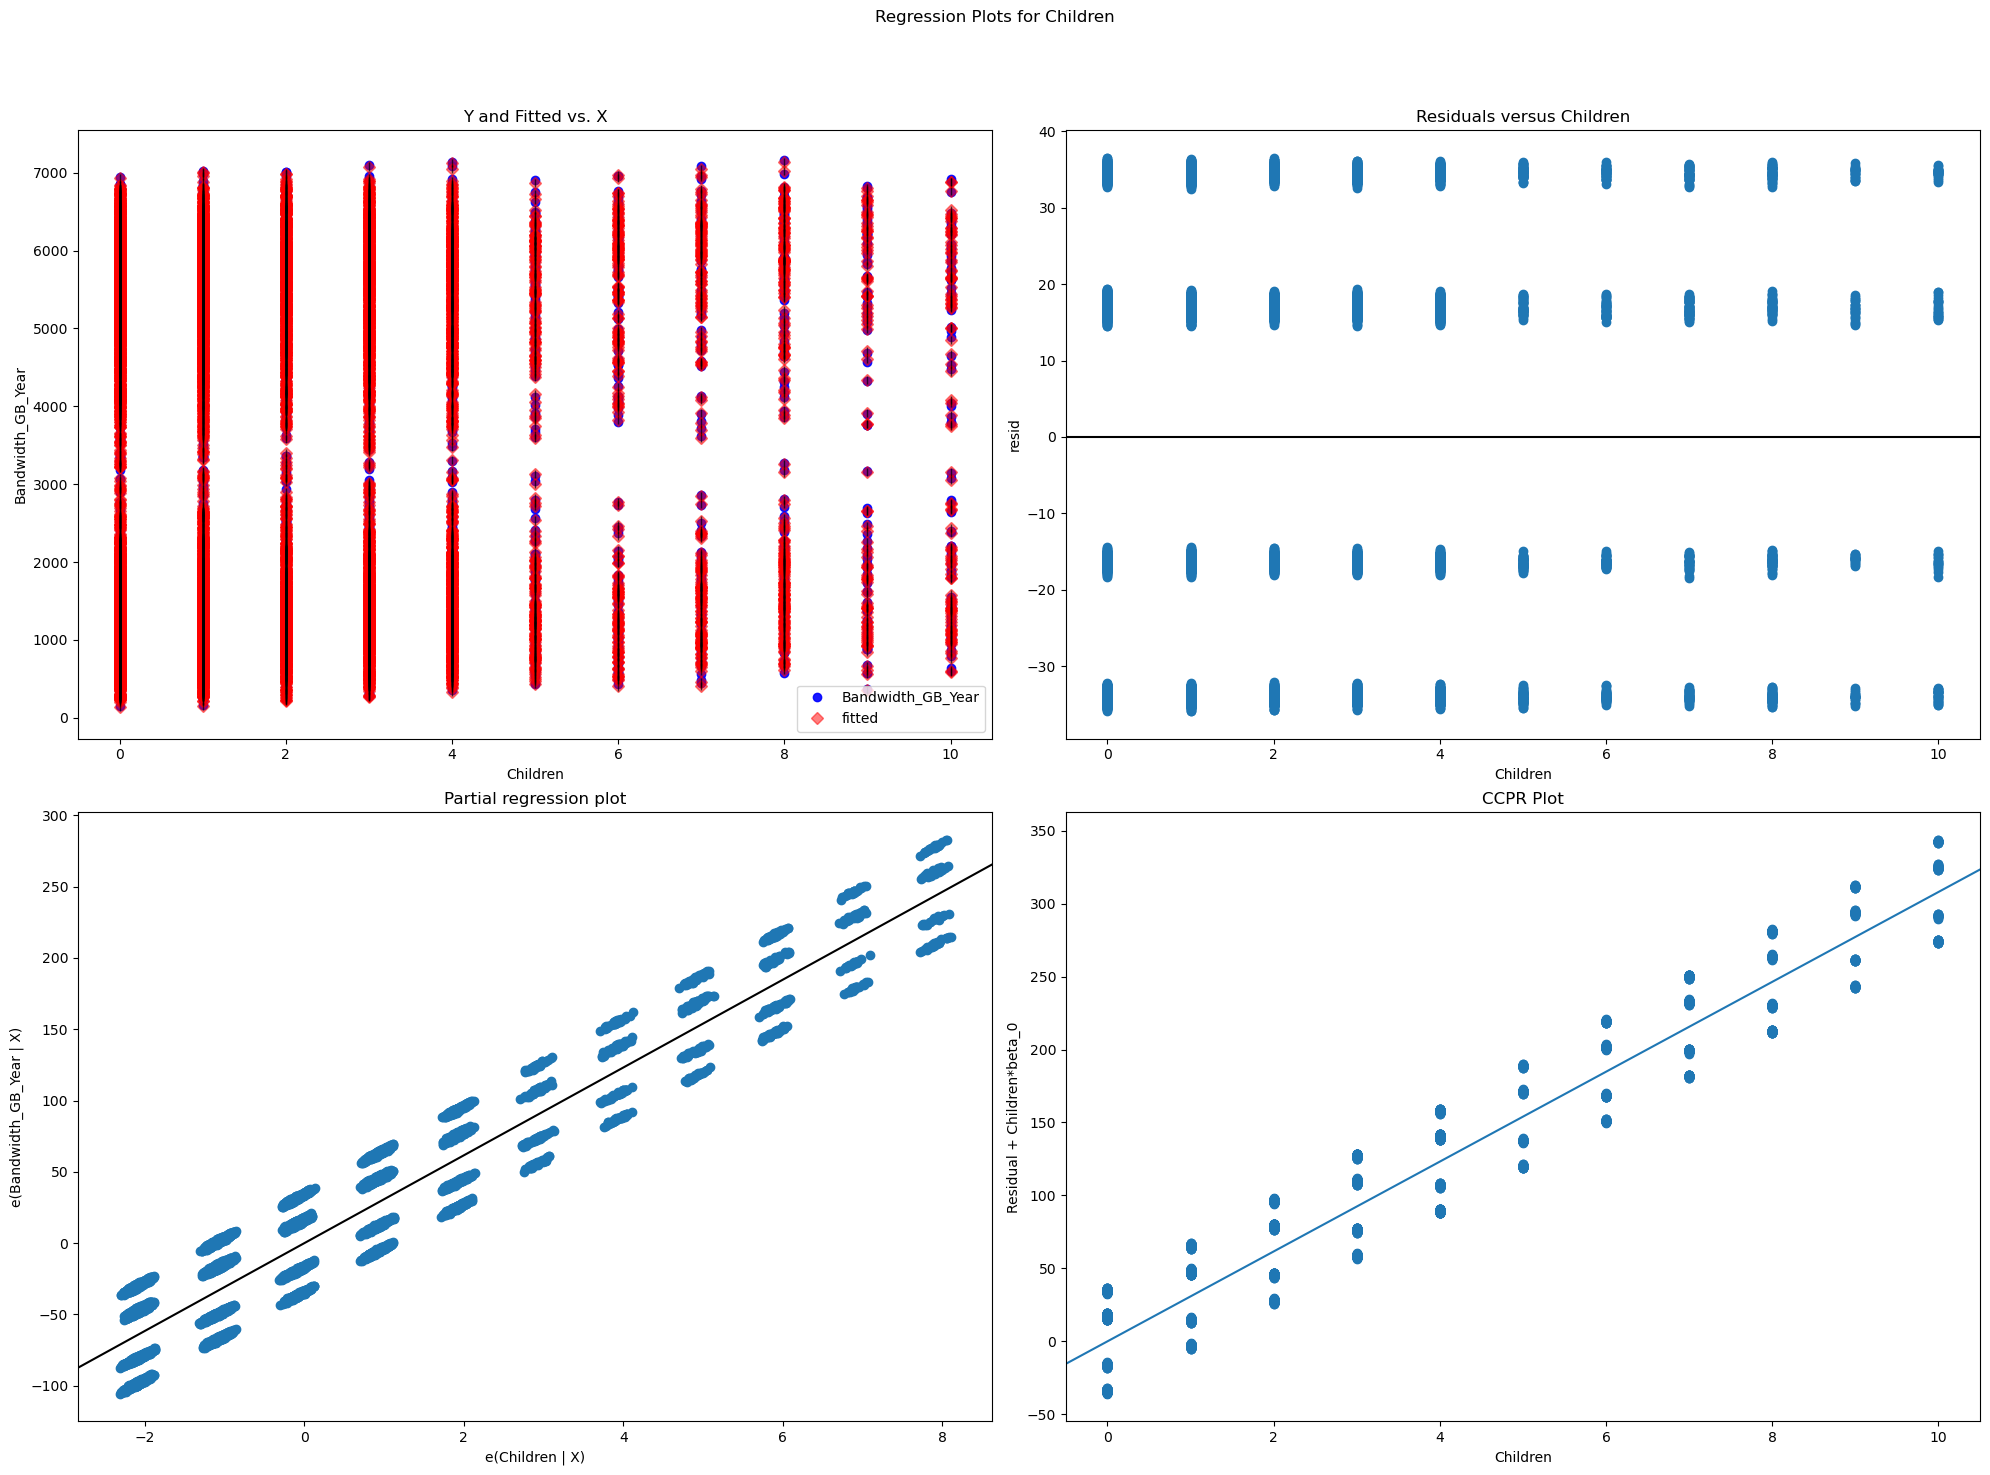

In [144]:
# Below cells are plots of residuals
fig = plt.figure(figsize = [20,15])
sm.graphics.plot_regress_exog(lr, 'Children', fig=fig);

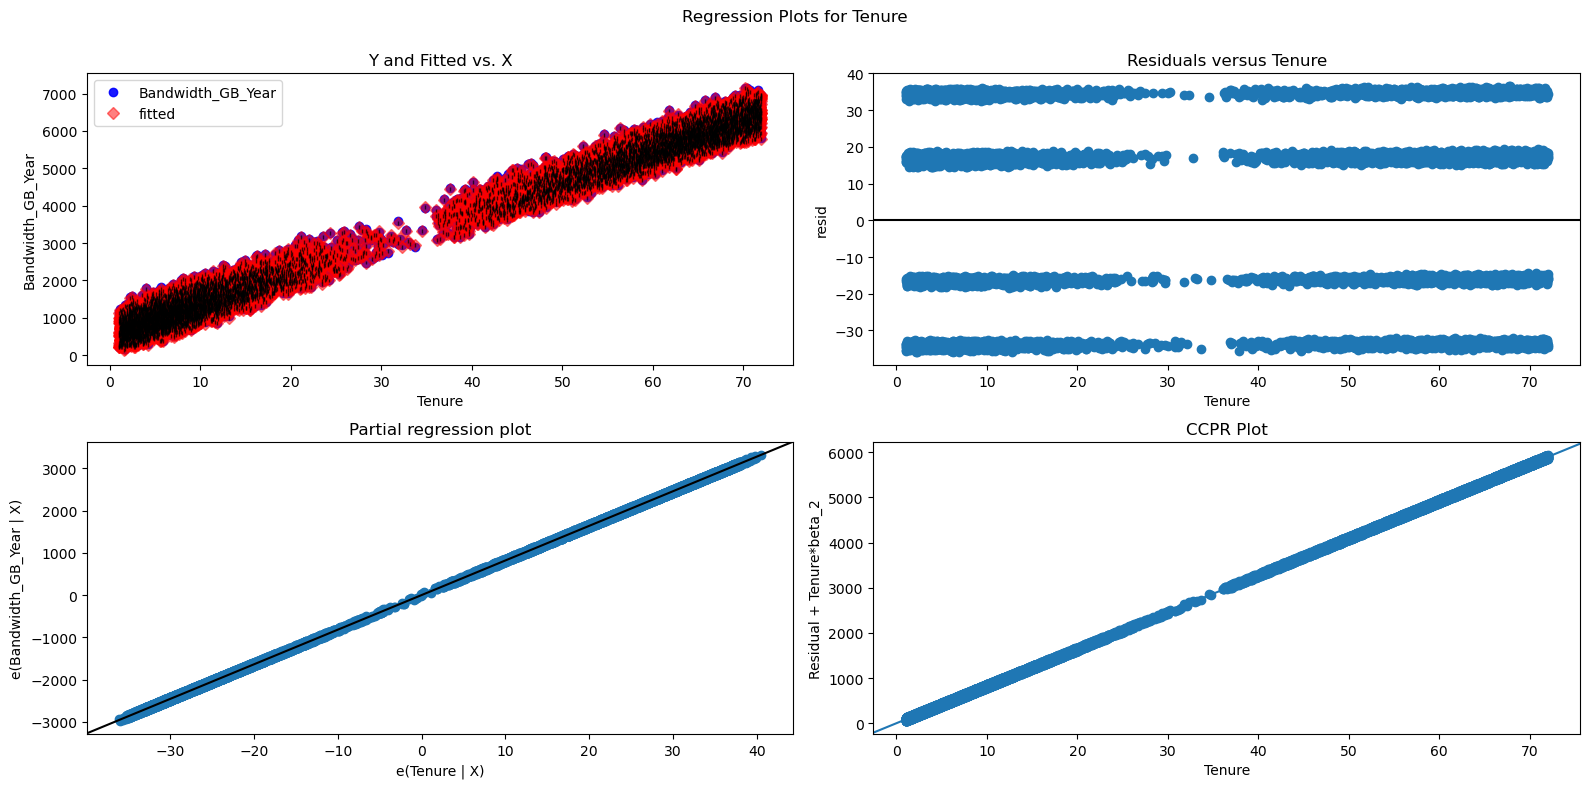

In [145]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(lr, 'Tenure', fig=fig);

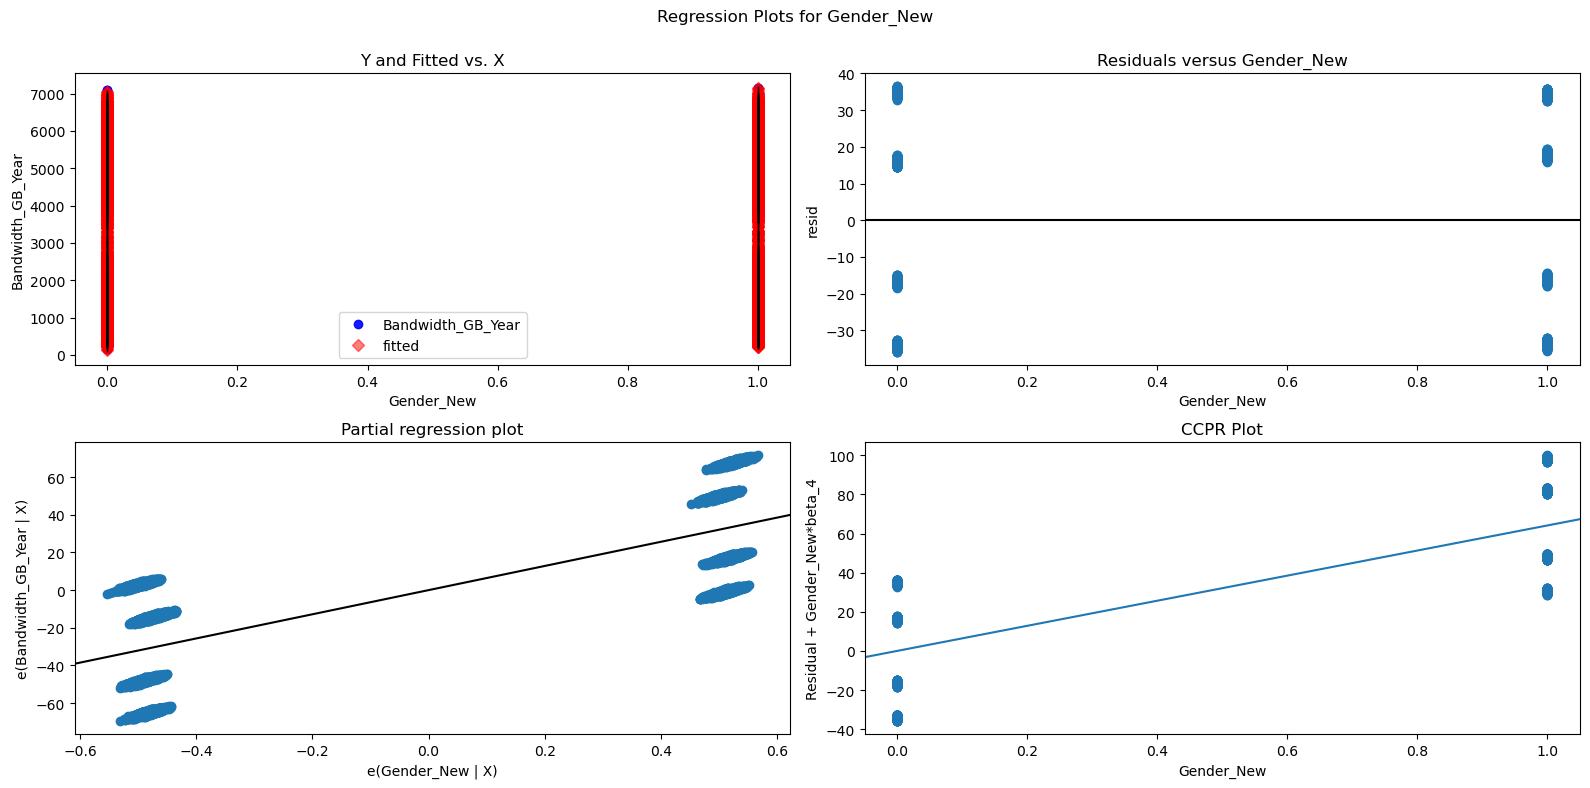

In [146]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(lr, 'Gender_New', fig=fig);

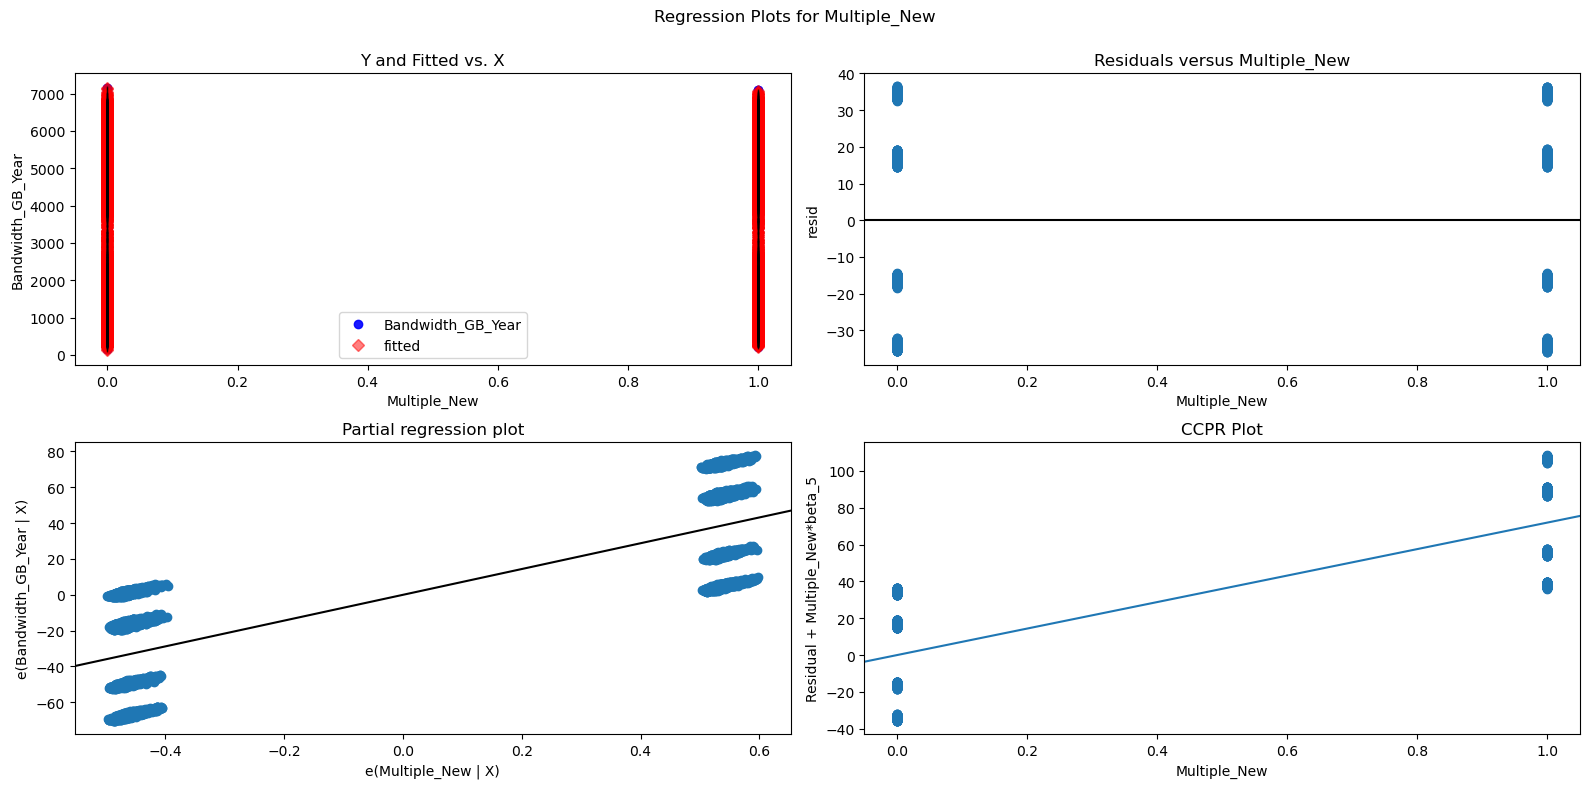

In [147]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(lr, 'Multiple_New', fig=fig);

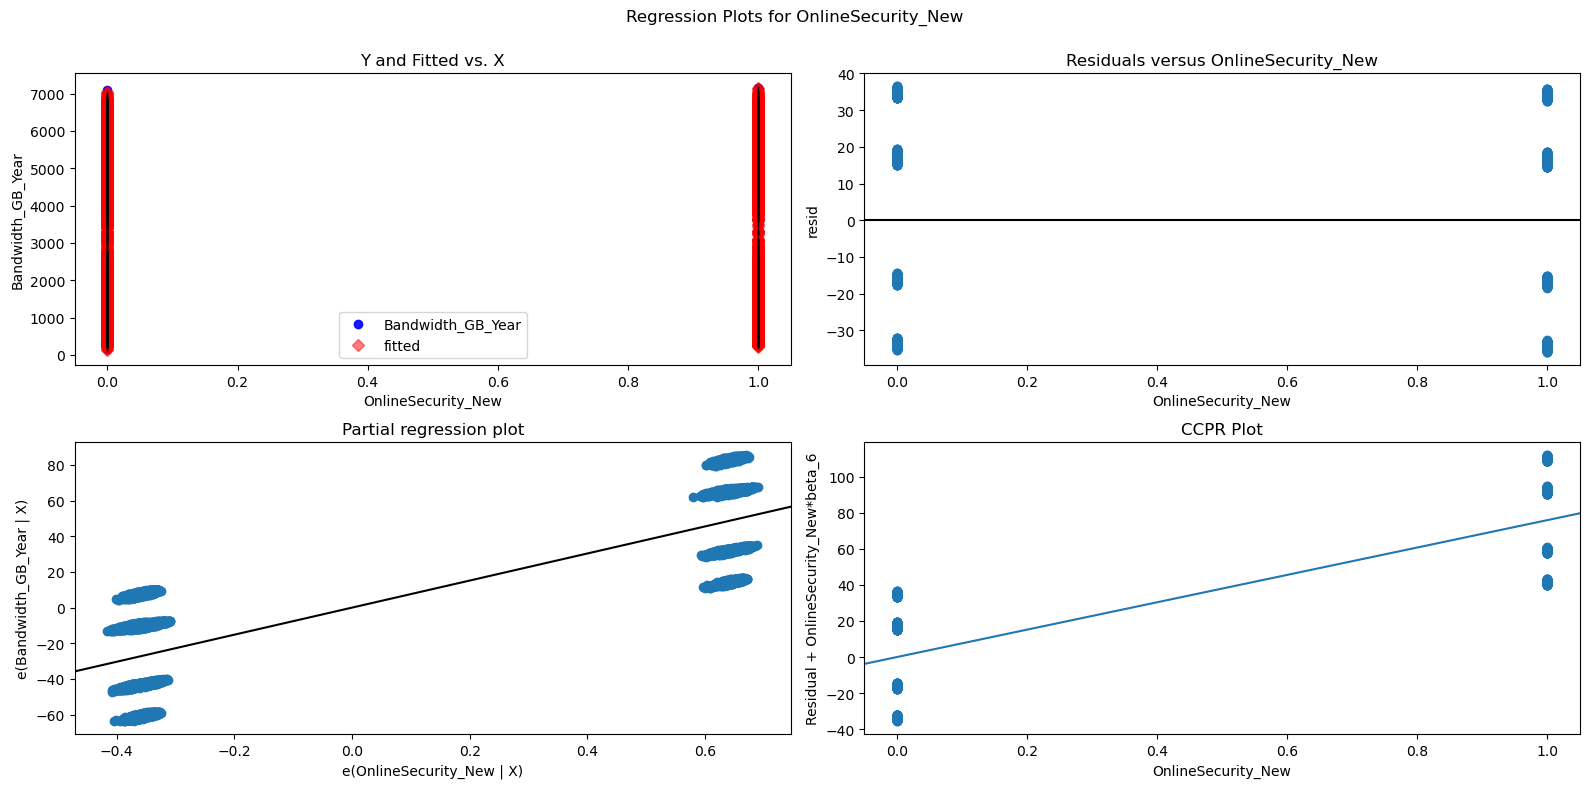

In [148]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(lr, 'OnlineSecurity_New', fig=fig);

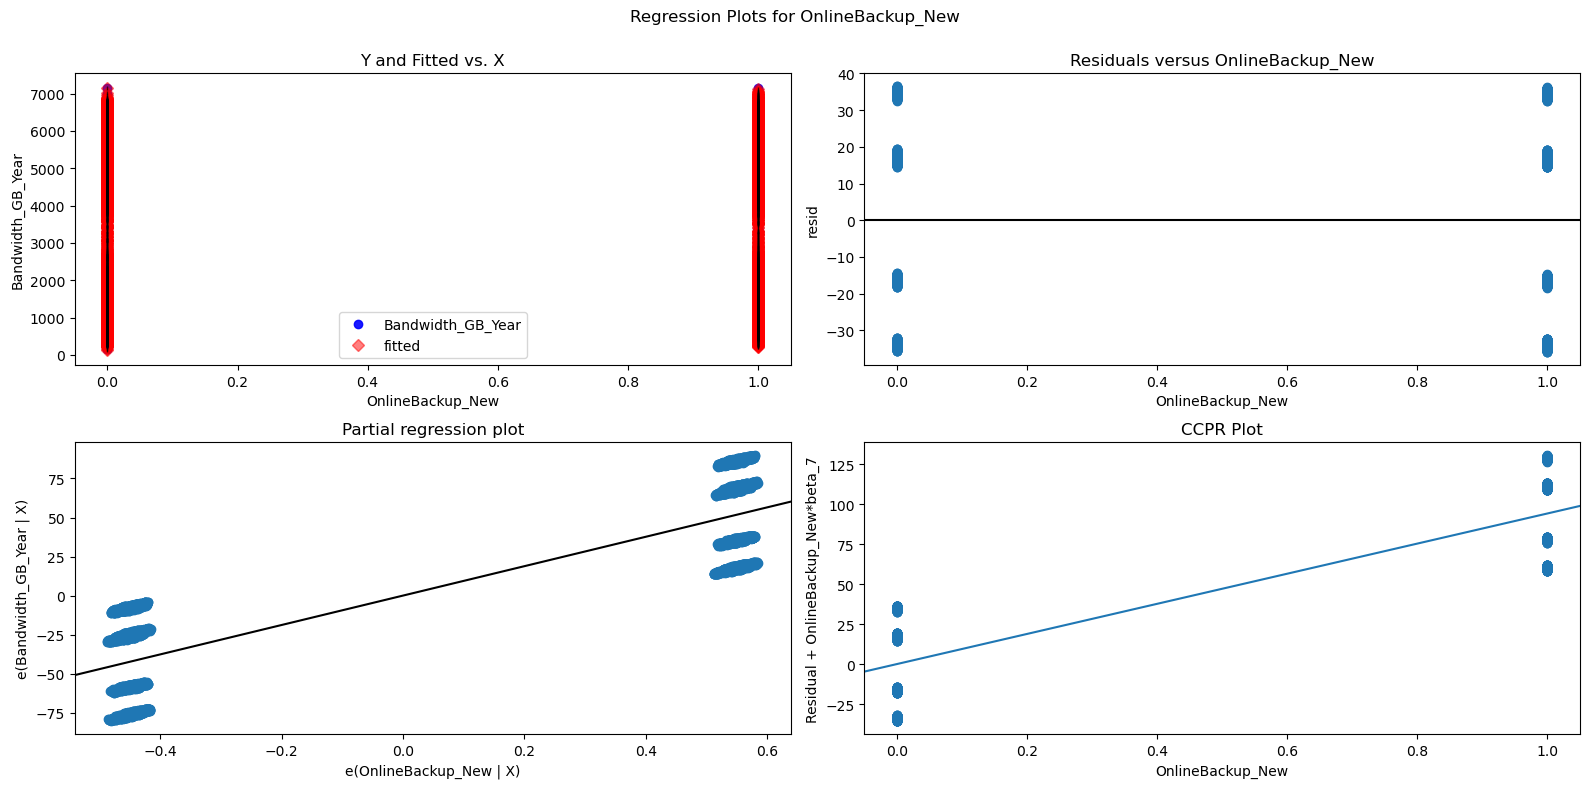

In [149]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(lr, 'OnlineBackup_New', fig=fig);

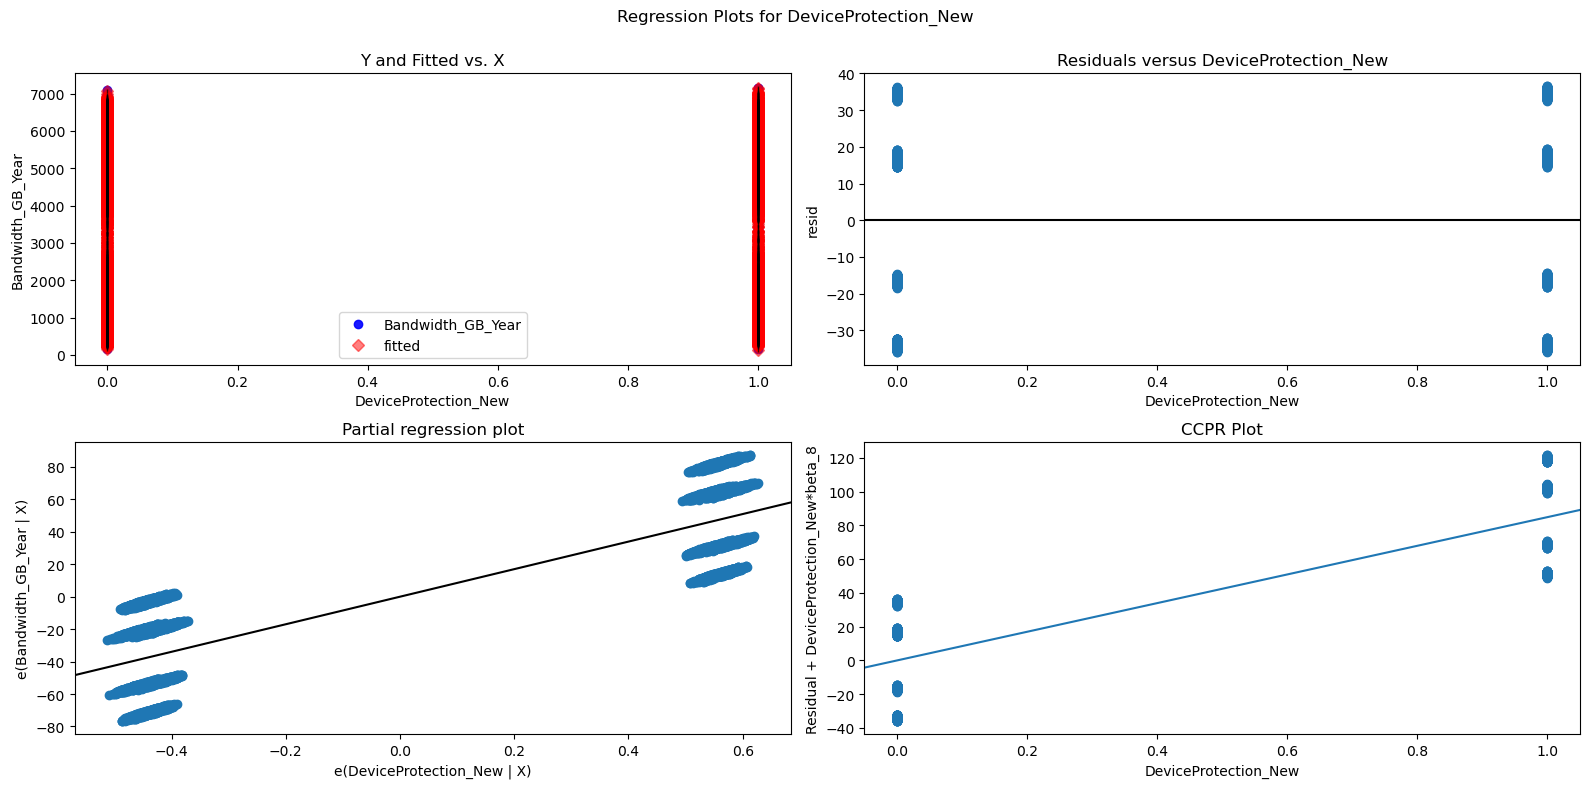

In [150]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(lr, 'DeviceProtection_New', fig=fig);

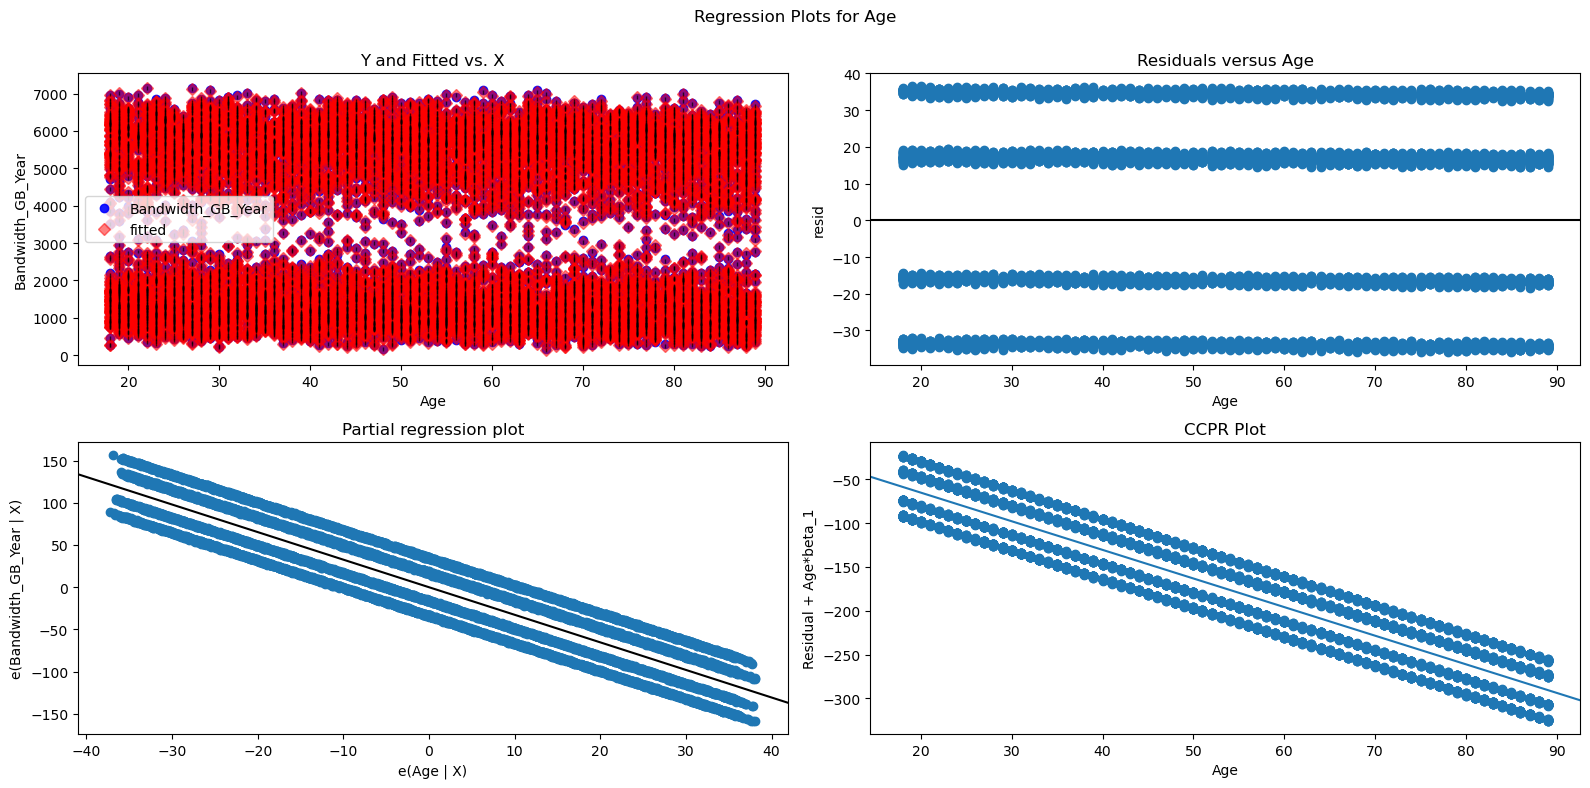

In [151]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(lr, 'Age', fig=fig);

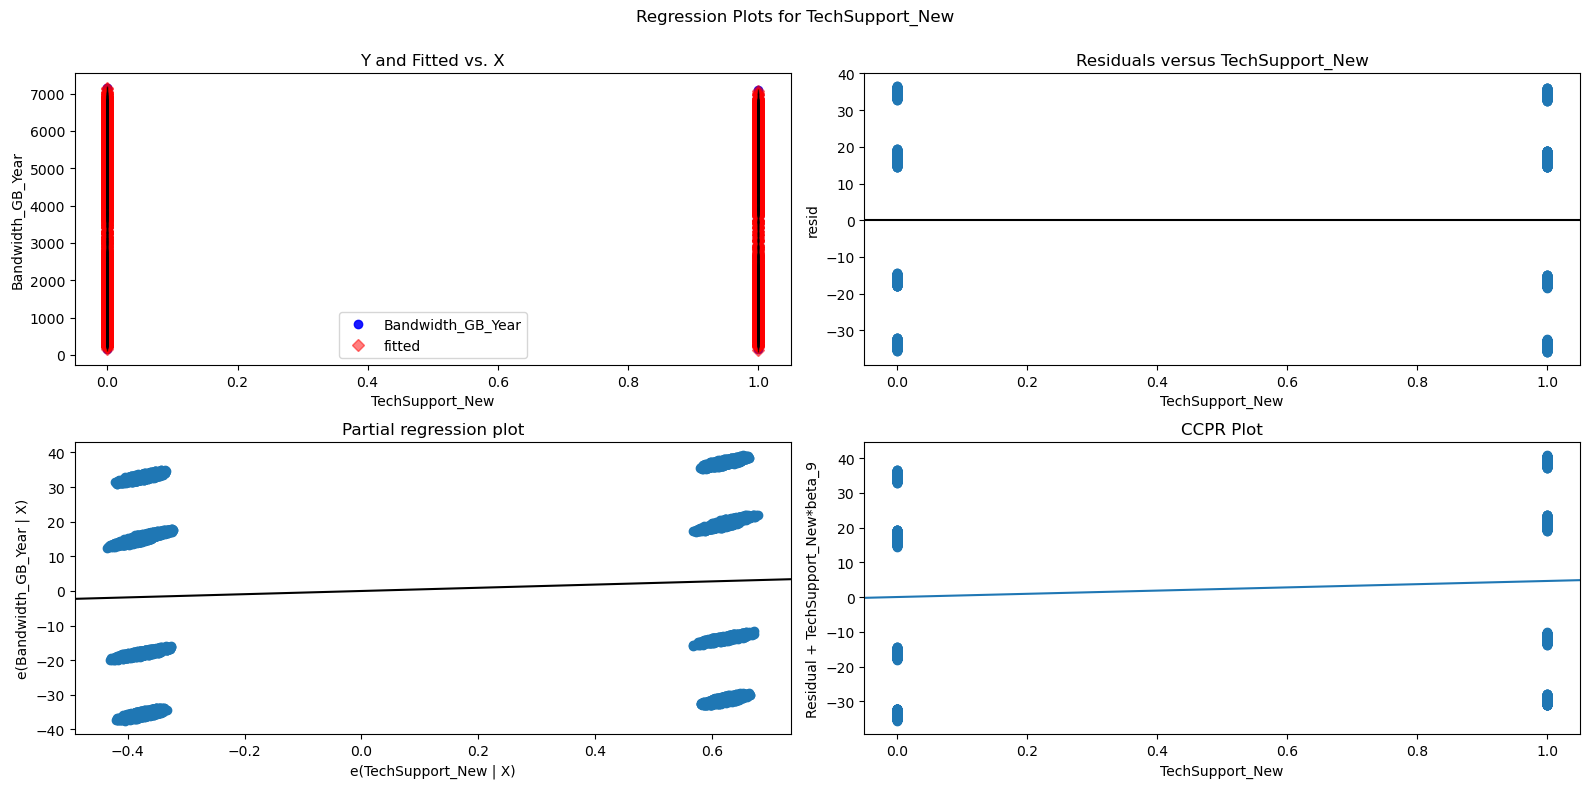

In [152]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(lr, 'TechSupport_New', fig=fig);

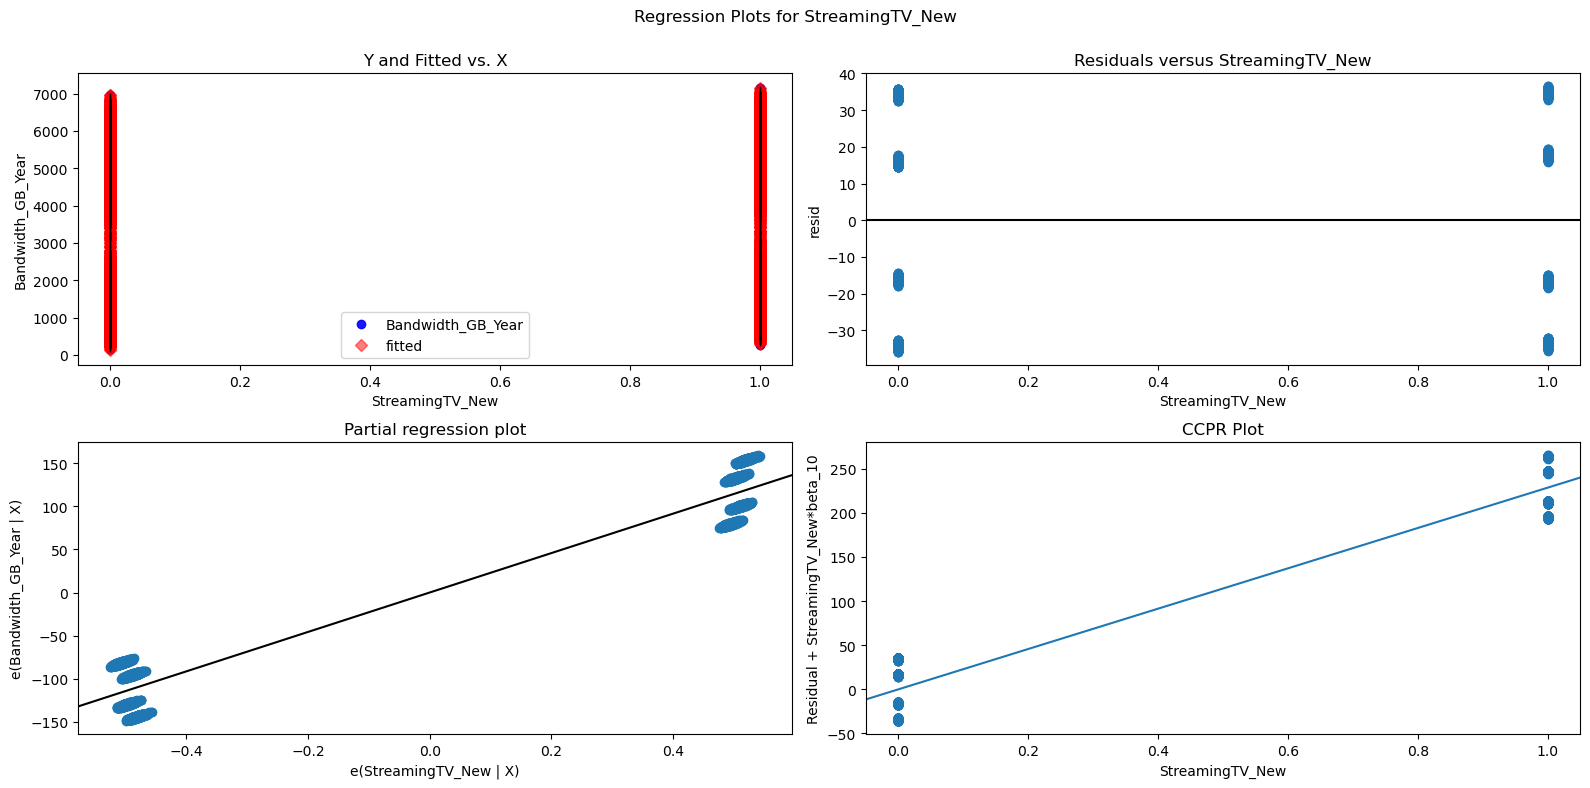

In [153]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(lr, 'StreamingTV_New', fig=fig);

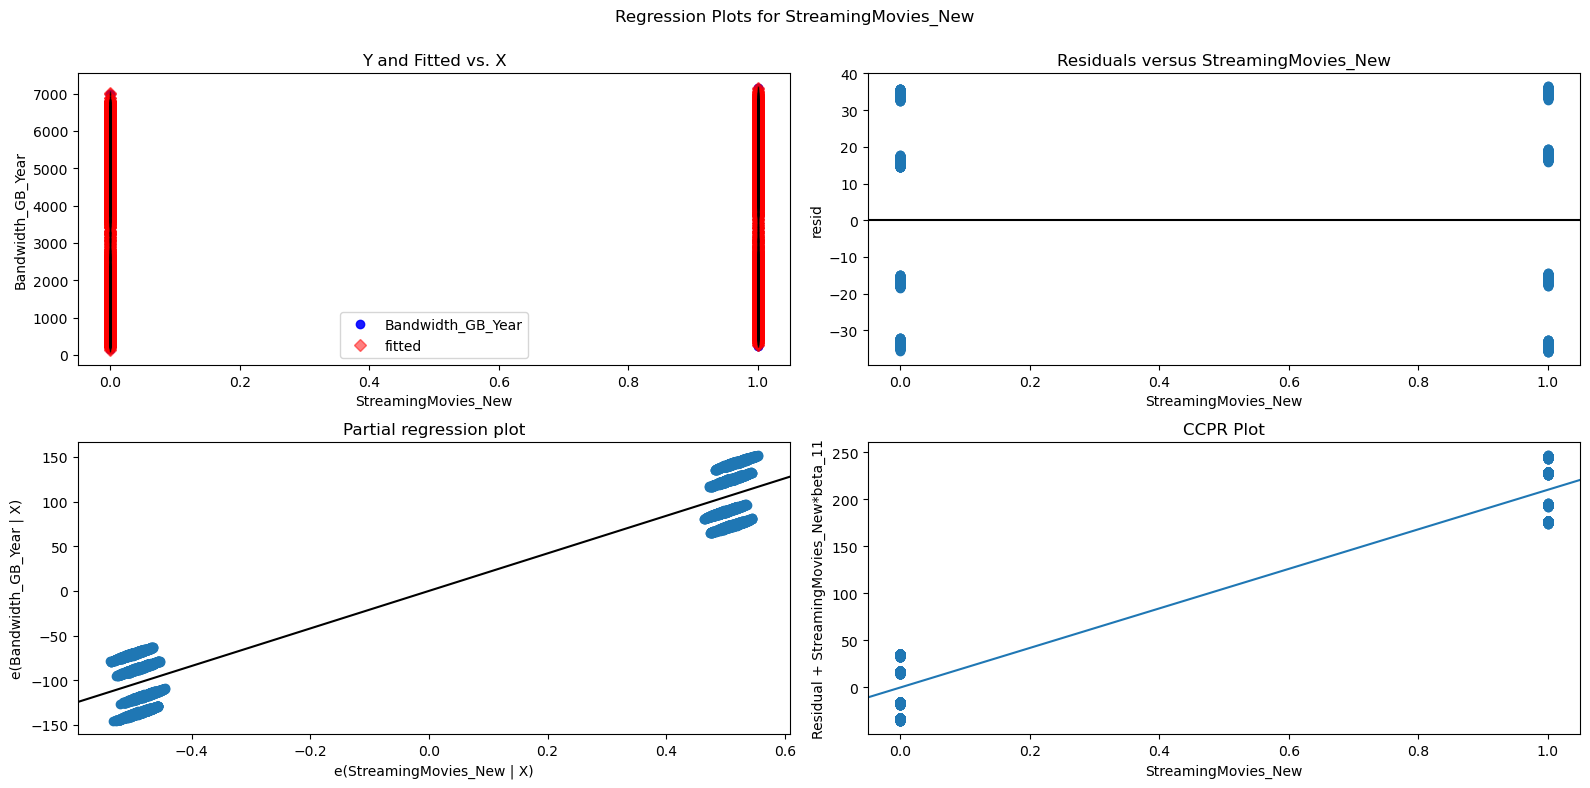

In [154]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(lr, 'StreamingMovies_New', fig=fig);

In [155]:
rse = np.sqrt(lr.mse_resid)
print(f'Residual Standard Error for the model: {rse}')

Residual Standard Error for the model: 26.84069492434131


## E3: Executable Code

An executable file will be uploaded in the submission folder labeled 'D208_LinearRegression_Task1'.

## F1: Results of Analysis

After building out the MLR model, we are able to form the below equation to describe the model:

y = 142.2972 + 30.7965(Children) - 3.2640(Age) + + 81.9286(Tenure) + 414.0560(IS_DSL) + 64.1716(Gender) + 71.9517(Multiple) + 75.8742(OnlineSecurity) + 94.1605(OnlineBackup) + 84.9106(DeviceProtection) + 4.6257(TechSupport) + 228.5303(StreamingTV) + 210.0323(StreamingMovies)

1. The average customer will have an increase in 30.7965 GB per year for each child they have.
2. The average customer's data usage will decrease by 3.2640 GB per year for each additional year of age.
3. The average male customer will use 81.9286 more GB per year than a female customer.
4. If a customer has multiple phone lines, he or she will use an additional 71.9517 GB per year.
5. If a customer has the add-on service of online security, they will use an additional 75.8742 GB per year.
6. If a customer has the add-on service of online backup, they will use an additional 94.1605 GB per year.
7. If a customer has the add-on service of device protection, they will use an additional 84.9106 GB per year.
8. If a customer has the add-on service of tech support, they will use an additional 4.6257 GB per year.
9. If a customer has the add-on service of TV streaming, they will use an additional 2228.53903 GB per year.
10. If a customer has the add-on service of movie streaming, they will use an additional 210.0323 GB per year.
11. If a customer uses DSL internet, they will use an additional 414.0560 GB per year.

Based on statistical significance, we can refer to the F-statistic which came out to be 5.390e+06. We can also look at the probability of our F-statistic which is 0.00. This is below our alpha level of 0.05, leading us to believe the model is statistically significant. Intuitively all of the coefficients make sense for the research question we chose. As a customer either has more people in the household, or the person has more add-on services, the more likely they will be to use up more data throughout the year. 

We finish with an R-squared and adjusted R-squared value of 1.00 which in theory is perfect, but is likely too good to be true. After addressing all of potential multicollinearity issues by looking at VIF, this likely indicates that we have an independent variable that is highly correlated with the dependent variable. After looking at both the bivariate visualizations and our regression plots, my guess is that "Tenure," is likely to blame. For the purpose of the assignment, I did not remove it from this model after getting to this point, but this is something to consider for future analysis. 

One factor of concern is the high condition number reported by the model. 293.0 is a fairly high value, but in regards to the variables being observed, there could be relatively large fluctuations in data usage by each customer. All of the customers have varying levels of family size, and add-on services which can make the prediction very sensitive to change.


#### Limitations of Analysis
As for limitations on the analysis, one area of concern would be that the number of non-binary customers were removed from the data set. There was a very small sample size relative to male and female customers so it made sense to remove them from the data being used for the model. However, in the grand scheme, there could be some merit to finding a larger sample size and including them in the dummy variables that are used for this analysis.

Another limitation (by choice) was that demographic information was not included in this model. There may be further trends associated with a customer's location to help determine their data usage. For example, customers living in urban areas may be more inclined to use data than someone living in a rural area. This would add to the companies ability to pinpoint data usage across all of the service types.


## F2: Recommended Action

I am not an expert in the telecommunication space to know what increased data usage looks like from a business perspective (i.e. What is the cost to the company for a customer using more data?).

With that being said, I will propose a few different scenarios for the company. If the goal of the company is to increase data usage, the company can offer discounted costs for add-on services by bundling more together. Say streaming TV and movies costs 10 dollars per month separately, the company could offer a bundle for both at 8 dollars per month. This same philosophy could be applied to all of the add-ons evaluated in the model.

If the company's goal is to better identify pricing strategies for customers, they can use the model in a variety of ways. The company could offer unlimited data plans to either high data users, or even low data users under the guise of it being a "deal." Determining how much data a prospective user will use based on the family size, gender, and expected add-ons included in the package.

If the company's goal is to reduce churn amongst a select group of customers (this was not included in the analysis), they can offer discounts to customers that are using smaller amounts of data. If a customer is not tech-savvy or is not using computers, TVs, or phones at a large rate, they may not be interested in the prices offered by the company and look for a more affordable plan with a competitor.

All of the above scenarios would be determined by the stakeholders for whatever goals the company has. However, without access to knowing specifically what the company hopes to do with the information, it is tough to make a direct suggestion and just possible ways to use the data.

## G: Panopto Recording

__[Panopto Video Recording Task 1](https://wgu.hosted.panopto.com/Panopto/Pages/Capture.aspx?folderId=c5e28fac-6ad0-4e87-b856-ac720189cb27)__

## H: Web Sources

1. https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

2. https://towardsdatascience.com/feature-selection-techniques-in-regression-model-26878fe0e24e

3. https://www.sharpsightlabs.com/blog/pandas-get-dummies/

4. https://www.geeksforgeeks.org/how-to-create-a-residual-plot-in-python/

## I: Other Source

1. __[DataCamp Videos from WGU Courseware](https://app.datacamp.com/learn/custom-tracks/custom-d208-predictive-modeling)__

2. Code from previous submissions for D206 and D207